In [ ]:
winequality-red.csv


COMPLETE WORKFLOW INCLUDES:
Load and inspect dataset

Check for duplicates & missing values

Univariate, bivariate, and multivariate analysis

Outlier detection

Feature engineering

Feature scaling

Feature selection (forward & backward)

Model building (KNN)

Evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.4             0.700         0.00             1.9      0.076   
2               7.4             0.700         0.00             1.9      0.076   
3               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    11.0                  34.0  0.99780  3.51       0.56   
2                    11.0                  34.0  0.99780  3.51       0.56   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.4        6  
2         9.4        7  
3         9.4        8  
4         9.4        9  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.shape

(1599, 12)

In [7]:
df.size

19188

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.299812          0.540732     0.249412        2.490901   
std         1.719721          0.177270     0.202514        1.369638   
min         4.900000          0.120000     0.000000        0.900000   
25%         7.200000          0.400000     0.045000        1.900000   
50%         7.800000          0.540000     0.240000        2.100000   
75%         9.200000          0.682500     0.410000        2.600000   
max        15.900000          1.580000     0.790000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.084923            15.386492             43.853659     0.996864   
std       0.040302            10.099293             30.498725     0.001873   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.071000             8.000000             23.000000     0.995680   
50%       0.077000            12.000000             34.000000     0.997000   
75%       0.088000            20.500000             55.000000     0.997800   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol     quality  
count  1599.000000  1599.000000  1599.000000  1599.00000  
mean      3.328587     0.644753    10.375704    13.46404  
std       0.157473     0.147437     1.064998    27.56655  
min       2.860000     0.330000     8.400000     3.00000  
25%       3.220000     0.560000     9.500000     5.00000  
50%       3.330000     0.600000    10.100000     6.00000  
75%       3.450000     0.710000    11.100000     6.00000  
max       4.010000     1.620000    14.900000   163.00000

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(221)

In [11]:
df = df.drop_duplicates()

In [12]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.4             0.700         0.00             1.9      0.076   
2               7.4             0.700         0.00             1.9      0.076   
3               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    11.0                  34.0  0.99780  3.51       0.56   
2                    11.0                  34.0  0.99780  3.51       0.56   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.4        6  
2         9.4        7  
3         9.4        8  
4         9.4        9  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1378 rows x 12 columns]

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(1378, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1378 non-null   float64
 1   volatile acidity      1378 non-null   float64
 2   citric acid           1378 non-null   float64
 3   residual sugar        1378 non-null   float64
 4   chlorides             1378 non-null   float64
 5   free sulfur dioxide   1378 non-null   float64
 6   total sulfur dioxide  1378 non-null   float64
 7   density               1378 non-null   float64
 8   pH                    1378 non-null   float64
 9   sulphates             1378 non-null   float64
 10  alcohol               1378 non-null   float64
 11  quality               1378 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 140.0 KB


In [16]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1378.000000       1378.000000  1378.000000      1378.00000   
mean        8.277794          0.544550     0.246466         2.47275   
std         1.705099          0.179985     0.204055         1.30749   
min         4.900000          0.120000     0.000000         0.90000   
25%         7.200000          0.400000     0.040000         1.90000   
50%         7.700000          0.550000     0.240000         2.10000   
75%         9.100000          0.698750     0.410000         2.60000   
max        15.900000          1.580000     0.790000        15.50000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1378.000000          1378.000000           1378.000000  1378.000000   
mean      0.085098            15.321480             44.101959     0.996842   
std       0.041547             9.983813             30.855308     0.001851   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.071000             8.000000             23.000000     0.995680   
50%       0.077000            12.000000             34.000000     0.997000   
75%       0.088000            20.000000             55.000000     0.997800   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1378.000000  1378.000000  1378.000000  1378.000000  
mean      3.330537     0.644492    10.376282    14.701016  
std       0.158823     0.148710     1.083721    29.507908  
min       2.860000     0.330000     8.400000     3.000000  
25%       3.220000     0.560000     9.400000     5.000000  
50%       3.330000     0.600000    10.000000     6.000000  
75%       3.460000     0.710000    11.100000     6.000000  
max       4.010000     1.620000    14.900000   163.000000

In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Univariate Analysis

In [18]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.4             0.700         0.00             1.9      0.076   
2               7.4             0.700         0.00             1.9      0.076   
3               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    11.0                  34.0  0.99780  3.51       0.56   
2                    11.0                  34.0  0.99780  3.51       0.56   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.4        6  
2         9.4        7  
3         9.4        8  
4         9.4        9  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1378 rows x 12 columns]

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

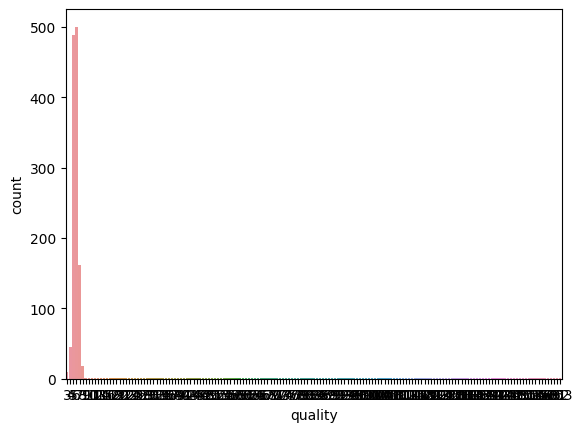

In [20]:
sns.countplot(data = df,x = 'quality')
plt.show()

In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
df['fixed acidity'].unique()

array([ 7.4,  6.8,  7.6,  7.8,  7.3,  7.5,  7.9,  8. ,  6.9,  7. ,  8.8,
        8.9,  7.2,  6.7,  7.7,  8.2,  6.4, 11.5,  5.4,  9.6, 12.8, 11. ,
        9.7, 11.6,  8.7,  8.1,  8.6,  8.4,  9. ,  5.2,  8.5, 12. , 15. ,
        7.1, 10.8, 11.1,  9.4,  6.6, 10. , 12.5, 11.8, 10.9, 10.3, 11.4,
        9.9, 10.4, 13.3, 10.6,  8.3,  9.8,  9.3, 13.4, 10.7, 10.2, 11.9,
       12.4, 12.2, 13.8,  9.1, 13.5,  6.1, 10.5, 12.6, 14. , 13.7,  5.6,
        9.5, 12.7, 12.3, 15.6,  5.3, 11.3,  9.2, 13. ,  6.5, 11.2, 12.9,
       14.3,  5. , 15.5,  6.2, 11.7, 13.2, 10.1,  6.3, 15.9, 12.1,  5.1,
        4.9,  5.9,  6. ,  5.8,  5.5,  5.7])

In [23]:
df['fixed acidity'].value_counts()

fixed acidity
7.4     192
7.2      46
7.1      42
7.0      40
7.5      36
       ... 
15.5      1
4.9       1
12.1      1
5.5       1
5.7       1
Name: count, Length: 94, dtype: int64

<Axes: >

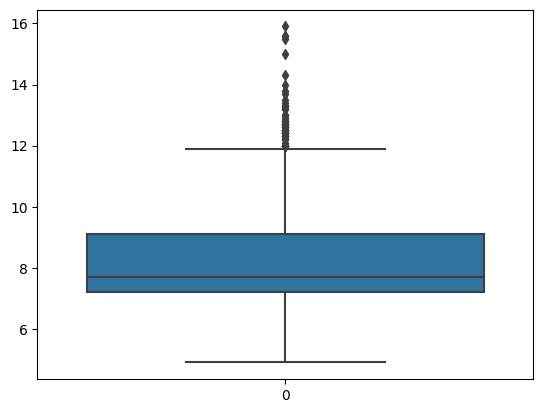

In [24]:
sns.boxplot(df['fixed acidity'])

In [25]:
import scipy.stats as stats
def check_gaussian(data):
    # Histogram with KDE (Kernel Density Estimate)
    sns.distplot(data, kde=True)
    plt.title("Distribution Plot")
    plt.show()

    # Q-Q plot (Quantile-Quantile Plot)
    stats.probplot(data, dist='norm', plot=plt)
    plt.title("Q-Q Plot")
    plt.show()

    # Anderson-Darling Test
    a = stats.anderson(data, dist='norm')
    if a.statistic > a.critical_values[2]:  # 5% significance level
        print('Column is non-Gaussian')
    else:
        print('Column is Gaussian')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


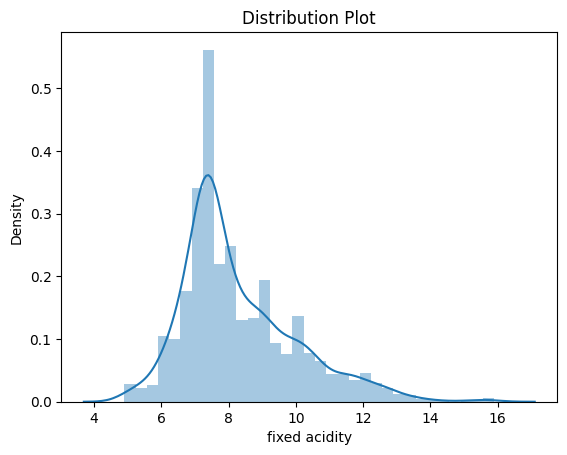

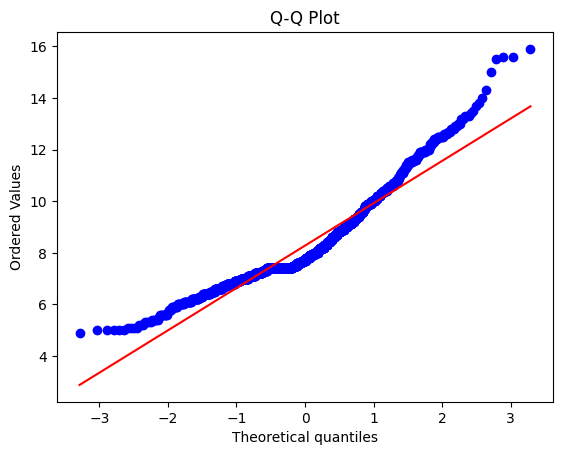

Column is non-Gaussian


In [26]:
check_gaussian(df['fixed acidity'])

In [27]:
skewness = df['fixed acidity'].skew()
skewness

np.float64(1.0800727868485178)

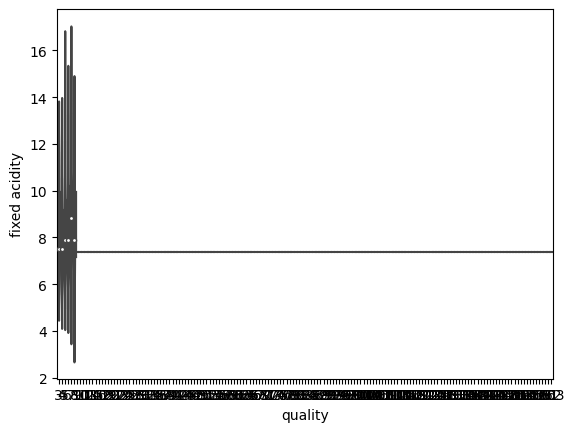

In [28]:
sns.violinplot(data = df, x= 'quality',y = 'fixed acidity')
plt.show()

In [29]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.4             0.700         0.00             1.9      0.076   
2               7.4             0.700         0.00             1.9      0.076   
3               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    11.0                  34.0  0.99780  3.51       0.56   
2                    11.0                  34.0  0.99780  3.51       0.56   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.4        6  
2         9.4        7  
3         9.4        8  
4         9.4        9  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1378 rows x 12 columns]

In [30]:
df['volatile acidity'].unique()

array([0.7  , 0.6  , 0.95 , 0.68 , 0.53 , 0.59 , 0.63 , 0.64 , 0.55 ,
       0.705, 0.885, 0.42 , 0.62 , 0.38 , 0.5  , 0.52 , 0.805, 0.61 ,
       0.73 , 0.31 , 0.39 , 0.49 , 0.37 , 0.58 , 0.3  , 0.835, 1.09 ,
       0.32 , 0.43 , 0.57 , 0.44 , 0.725, 0.735, 0.625, 0.34 , 0.645,
       0.635, 0.82 , 0.48 , 1.   , 0.21 , 0.66 , 0.35 , 0.775, 0.695,
       0.41 , 0.33 , 0.975, 0.56 , 0.26 , 0.87 , 0.54 , 0.18 , 0.545,
       0.715, 0.65 , 0.4  , 0.27 , 0.45 , 0.2  , 0.36 , 0.83 , 0.67 ,
       0.29 , 0.46 , 0.47 , 0.77 , 0.28 , 0.685, 0.815, 0.785, 0.795,
       0.665, 0.75 , 0.615, 0.575, 0.765, 0.24 , 0.415, 0.51 , 0.85 ,
       0.69 , 0.84 , 0.96 , 0.78 , 0.23 , 0.315, 0.655, 0.365, 0.25 ,
       0.22 , 0.825, 1.04 , 0.72 , 0.595, 0.585, 0.915, 0.755, 0.935,
       0.88 , 0.845, 1.24 , 0.8  , 0.98 , 1.185, 0.92 , 1.02 , 1.035,
       1.025, 0.565, 0.74 , 1.115, 0.865, 0.875, 0.965, 0.76 , 0.91 ,
       0.89 , 1.01 , 0.9  , 0.305, 0.395, 0.12 , 0.86 , 0.295, 1.005,
       0.71 , 0.745,

In [31]:
df['volatile acidity'].value_counts()

volatile acidity
0.700    166
0.580     34
0.400     30
0.600     29
0.500     29
        ... 
1.580      1
0.475      1
1.180      1
0.675      1
0.895      1
Name: count, Length: 140, dtype: int64

<Axes: >

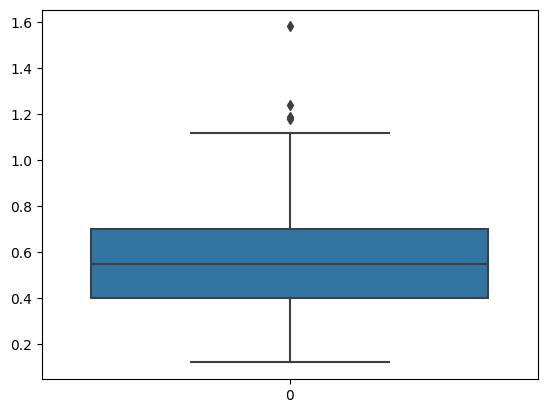

In [32]:
sns.boxplot(df['volatile acidity'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


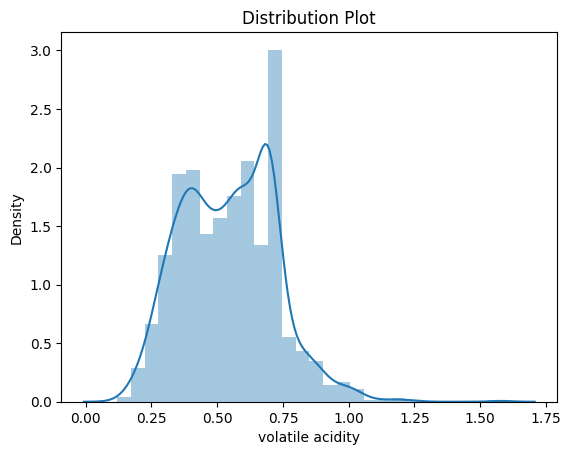

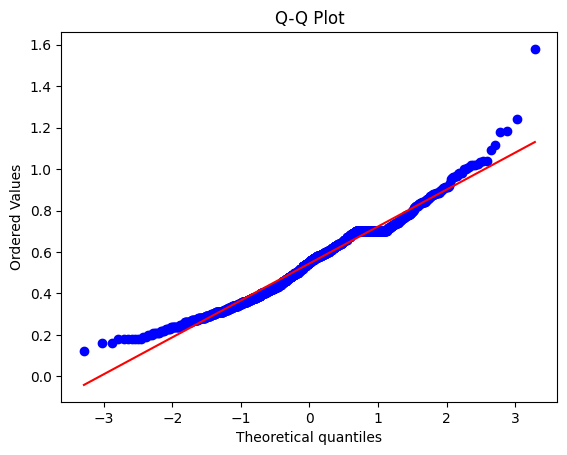

Column is non-Gaussian


In [33]:
check_gaussian(df['volatile acidity'])

In [34]:
skewness = df['volatile acidity'].skew()
skewness

np.float64(0.37665934287542496)

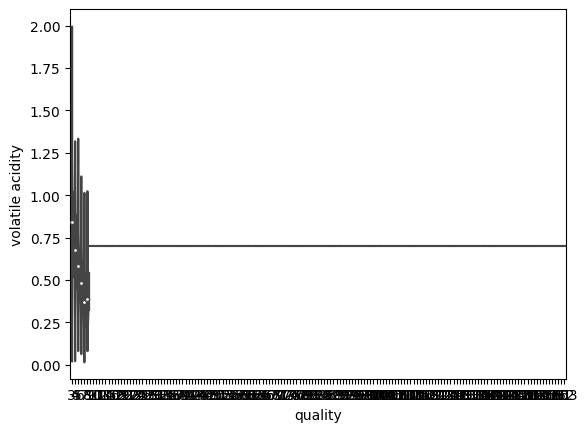

In [35]:
sns.violinplot(x= 'quality',y = 'volatile acidity',data = df)
plt.show()

In [36]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
df['citric acid'].unique()

array([0.  , 0.18, 0.03, 0.02, 0.04, 0.26, 0.48, 0.1 , 0.07, 0.24, 0.17,
       0.05, 0.21, 0.42, 0.14, 0.49, 0.2 , 0.57, 0.33, 0.32, 0.35, 0.25,
       0.12, 0.3 , 0.6 , 0.08, 0.06, 0.47, 0.11, 0.36, 0.74, 0.31, 0.28,
       0.58, 0.64, 0.16, 0.22, 0.19, 0.37, 0.5 , 0.09, 0.56, 0.44, 0.23,
       0.76, 0.52, 0.46, 0.51, 0.45, 0.68, 0.55, 0.53, 0.38, 0.29, 0.39,
       0.66, 0.62, 0.01, 0.54, 0.67, 0.79, 0.4 , 0.63, 0.61, 0.71, 0.15,
       0.65, 0.59, 0.34, 0.69, 0.73, 0.72, 0.7 , 0.41, 0.27, 0.75, 0.13,
       0.43, 0.78])

In [38]:
df['citric acid'].value_counts()

citric acid
0.00    260
0.49     58
0.24     39
0.02     35
0.10     27
       ... 
0.71      1
0.72      1
0.70      1
0.75      1
0.78      1
Name: count, Length: 79, dtype: int64

<Axes: >

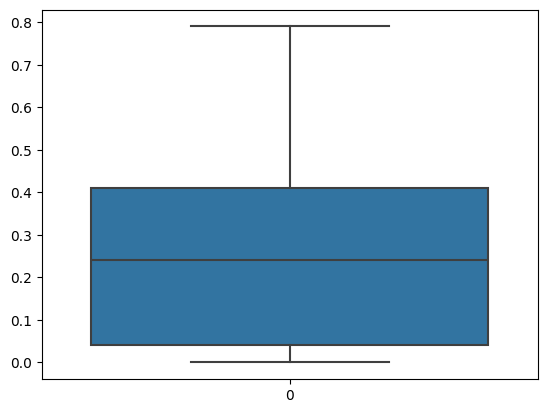

In [39]:
sns.boxplot(df['citric acid'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


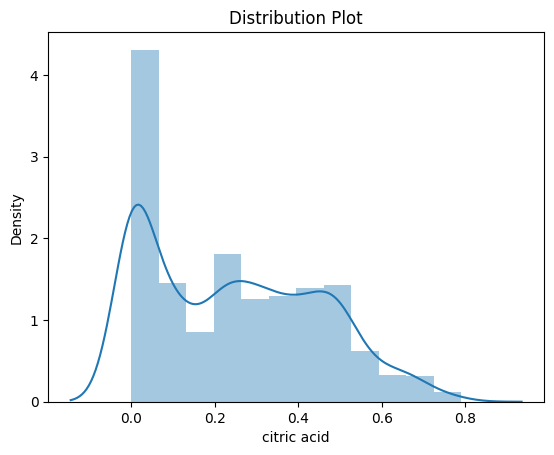

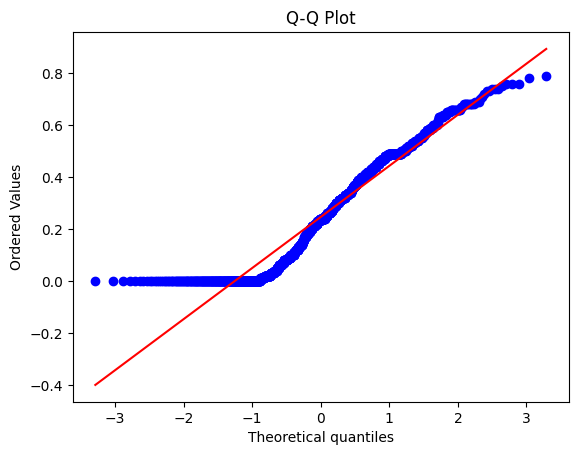

Column is non-Gaussian


In [40]:
check_gaussian(df['citric acid'])

In [41]:
skewness = df['citric acid'].skew()
skewness 

np.float64(0.3661034260715139)

<Axes: xlabel='quality', ylabel='citric acid'>

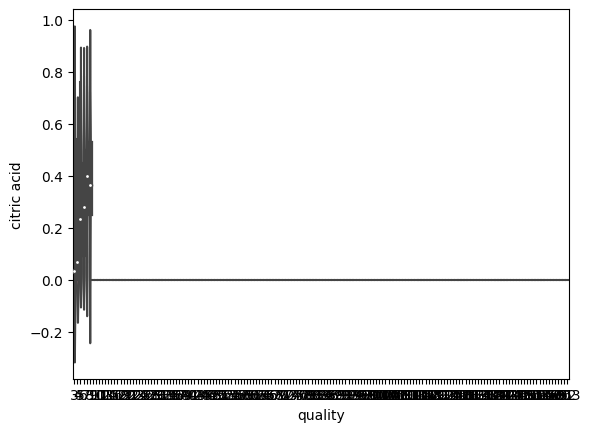

In [42]:
sns.violinplot(x = 'quality',y = 'citric acid',data = df)

In [43]:
df['residual sugar'].unique()

array([ 1.9 ,  2.  ,  1.3 ,  1.7 ,  7.3 ,  7.2 ,  2.1 ,  1.6 ,  1.8 ,
        1.5 ,  2.3 ,  2.5 ,  2.4 ,  2.6 ,  2.9 ,  3.8 ,  2.2 ,  1.2 ,
        1.4 ,  2.7 ,  2.8 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,  3.  ,
        4.  ,  7.  ,  6.4 ,  3.5 ,  3.4 , 11.  ,  3.65,  4.5 ,  4.8 ,
        2.95,  5.8 ,  4.4 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,
        2.15,  5.2 ,  2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  6.1 ,
        4.3 ,  5.15,  6.3 ,  5.1 ,  6.  ,  8.6 ,  7.5 ,  2.25,  4.25,
        3.9 ,  2.85,  3.45,  2.35,  2.65,  9.  ,  8.8 ,  5.  ,  5.9 ,
        1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,  5.5 ,  1.75,  7.8 ,
       12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 , 13.9 ])

In [44]:
df['residual sugar'].value_counts()

residual sugar
1.90     240
2.00     120
2.20      97
2.10      94
1.80      86
        ... 
15.40      1
3.75       1
13.80      1
5.70       1
13.90      1
Name: count, Length: 89, dtype: int64

<Axes: >

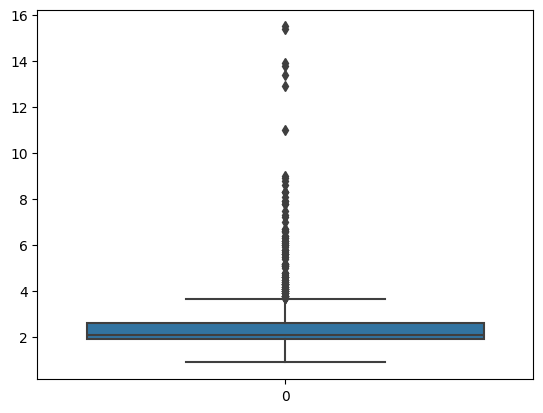

In [45]:
sns.boxplot(df['residual sugar'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


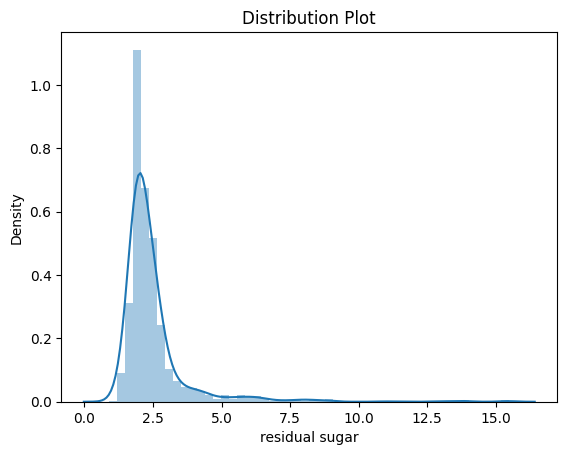

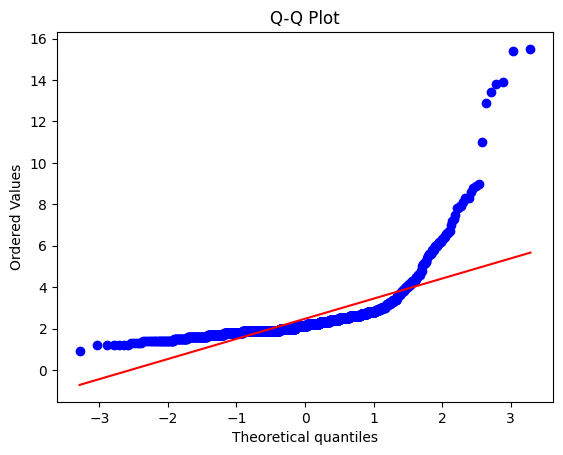

Column is non-Gaussian


In [46]:
check_gaussian(df['residual sugar'])

In [47]:
skewness = df['residual sugar'].skew()
skewness

np.float64(4.834270777402115)

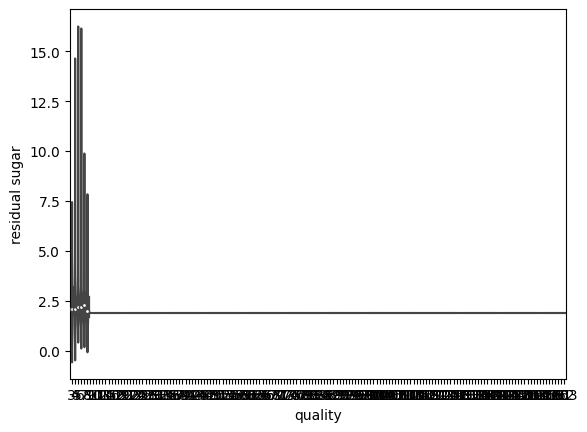

In [48]:
sns.violinplot(x = 'quality',y = 'residual sugar',data = df)
plt.show()

In [49]:
df['chlorides'].unique()

array([0.076, 0.079, 0.09 , 0.072, 0.07 , 0.1  , 0.085, 0.089, 0.36 ,
       0.058, 0.073, 0.068, 0.08 , 0.087, 0.067, 0.27 , 0.077, 0.111,
       0.082, 0.084, 0.074, 0.099, 0.071, 0.046, 0.061, 0.056, 0.097,
       0.075, 0.088, 0.095, 0.069, 0.054, 0.039, 0.083, 0.059, 0.06 ,
       0.092, 0.101, 0.057, 0.337, 0.081, 0.078, 0.065, 0.263, 0.093,
       0.102, 0.063, 0.611, 0.064, 0.096, 0.104, 0.358, 0.091, 0.105,
       0.343, 0.098, 0.094, 0.086, 0.186, 0.112, 0.213, 0.214, 0.062,
       0.121, 0.107, 0.122, 0.066, 0.128, 0.052, 0.103, 0.118, 0.12 ,
       0.116, 0.109, 0.159, 0.106, 0.124, 0.045, 0.174, 0.117, 0.047,
       0.127, 0.413, 0.152, 0.114, 0.053, 0.055, 0.051, 0.125, 0.2  ,
       0.171, 0.05 , 0.226, 0.25 , 0.108, 0.11 , 0.148, 0.143, 0.115,
       0.222, 0.157, 0.422, 0.034, 0.387, 0.415, 0.243, 0.241, 0.19 ,
       0.132, 0.126, 0.038, 0.044, 0.041, 0.165, 0.048, 0.145, 0.147,
       0.012, 0.119, 0.194, 0.161, 0.049, 0.123, 0.414, 0.216, 0.043,
       0.178, 0.042,

In [50]:
df['chlorides'].value_counts()

chlorides
0.076    192
0.078     44
0.080     43
0.074     36
0.079     35
        ... 
0.267      1
0.169      1
0.205      1
0.235      1
0.230      1
Name: count, Length: 140, dtype: int64

<Axes: >

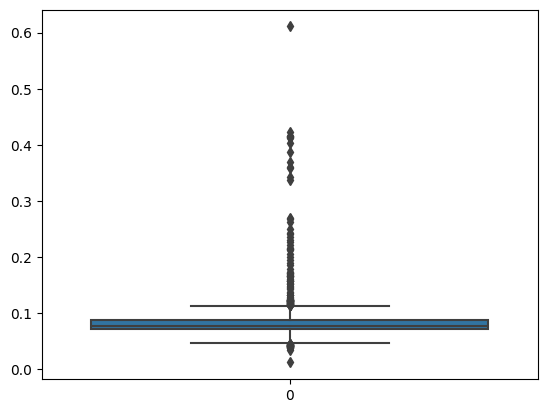

In [51]:
sns.boxplot(df['chlorides'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


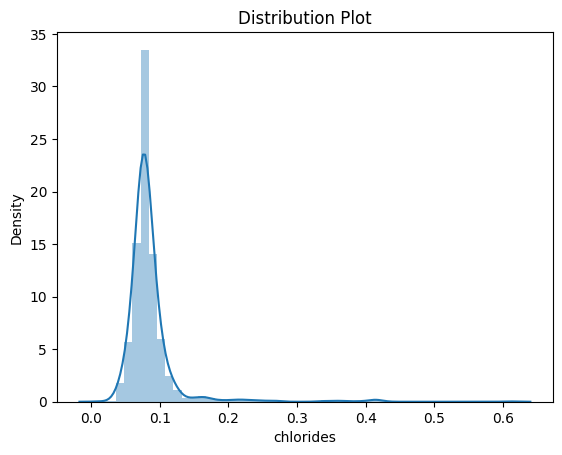

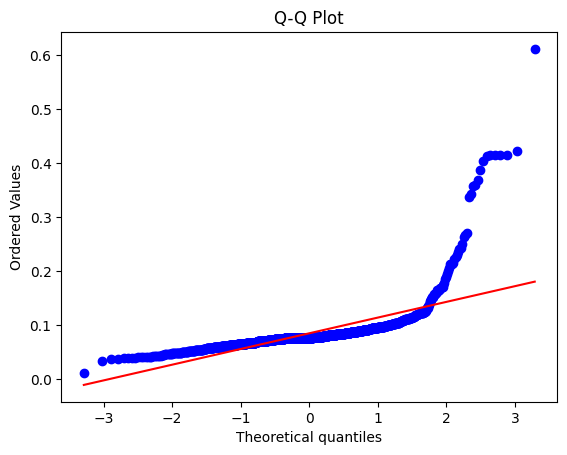

Column is non-Gaussian


In [52]:
check_gaussian(df['chlorides'])

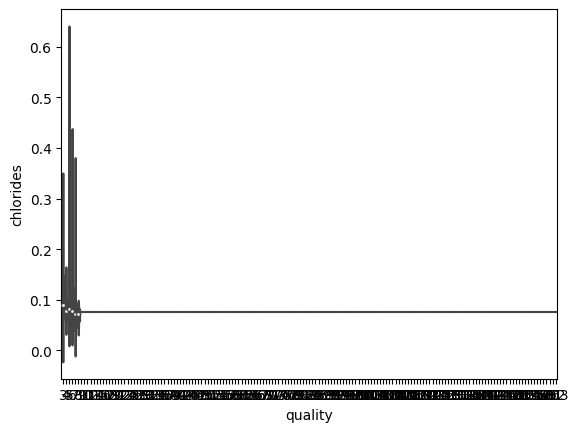

In [53]:
sns.violinplot(x = 'quality',y = 'chlorides',data = df)
plt.show()

In [54]:
df['free sulfur dioxide'].unique()

array([11. , 18. ,  7. ,  9. , 17. , 36. , 35. , 14. , 15. ,  4. ,  6. ,
       24. , 19. ,  8. , 10. , 23. , 16. , 26. , 21. , 12. , 13. , 39. ,
        5. , 28. , 29. , 27. , 32. , 25. , 20. , 33. , 30. , 37. , 40. ,
       40.5, 68. , 31. , 34. , 22. , 38. , 43. , 47. ,  1. , 41. , 54. ,
       46. , 45. ,  2. ,  5.5,  3. , 53. , 52. , 51. , 37.5, 42. , 57. ,
       50. , 48. , 72. , 55. , 66. ])

In [55]:
df['free sulfur dioxide'].value_counts()

free sulfur dioxide
11.0    199
6.0     117
5.0      82
7.0      59
10.0     59
15.0     57
12.0     55
16.0     49
9.0      48
13.0     40
8.0      39
17.0     39
14.0     37
18.0     36
3.0      33
21.0     32
19.0     31
4.0      30
26.0     29
24.0     27
23.0     27
20.0     24
27.0     20
28.0     18
25.0     18
29.0     17
32.0     17
34.0     16
31.0     14
22.0     14
35.0     13
30.0     11
33.0      9
36.0      9
38.0      7
39.0      4
41.0      4
40.0      4
45.0      3
43.0      3
48.0      3
52.0      2
37.0      2
1.0       2
37.5      2
42.0      2
51.0      2
68.0      1
54.0      1
47.0      1
40.5      1
5.5       1
53.0      1
46.0      1
2.0       1
57.0      1
50.0      1
72.0      1
55.0      1
66.0      1
Name: count, dtype: int64

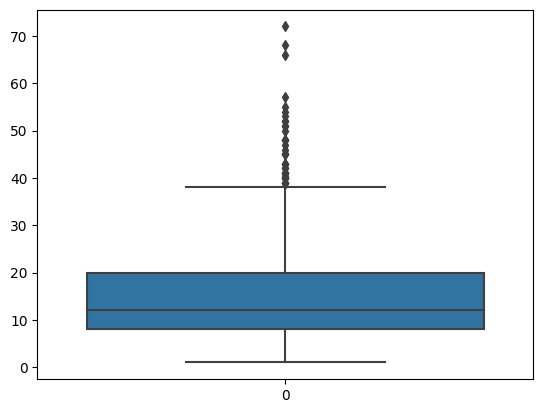

In [56]:
sns.boxplot(df['free sulfur dioxide'])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


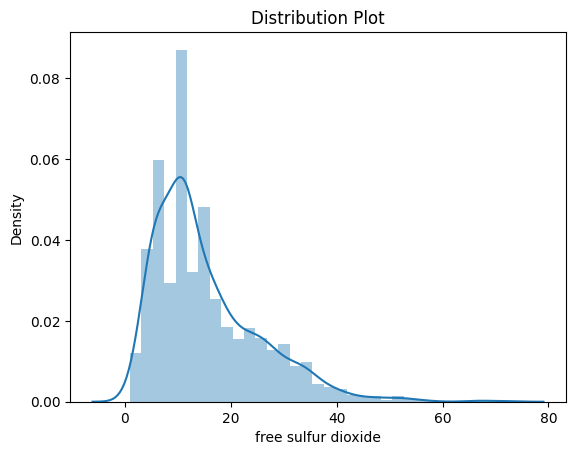

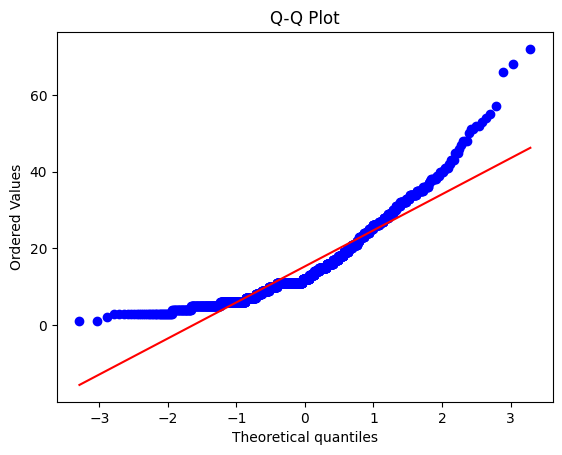

Column is non-Gaussian


In [57]:
check_gaussian(df['free sulfur dioxide'])

In [58]:
skewness = df['free sulfur dioxide'].skew()
skewness

np.float64(1.4048891926212463)

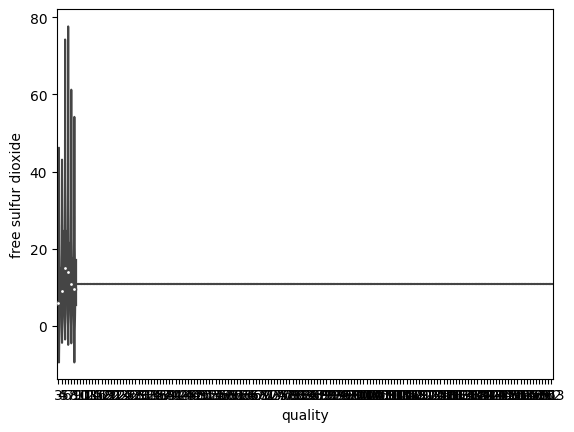

In [59]:
sns.violinplot(x = 'quality',y = 'free sulfur dioxide',data = df)
plt.show()

In [60]:
df['total sulfur dioxide'].unique()

array([ 34. ,  86. ,  20. ,  31. , 121. ,  96. , 101. ,  42. ,  44. ,
        63. ,   8. ,  18. ,  35. ,  49. ,  38. , 110. ,  65. ,  62. ,
        85. ,  67. ,  26. , 143. , 144. , 127. , 126. ,  28. , 120. ,
        55. ,  27. ,  93. ,  24. , 145. ,  39. ,  37. ,  95. ,  19. ,
        15. ,  41. ,  58. ,  72. ,  10. ,  81. ,  23. , 106. , 109. ,
        51. ,  73. ,  21. , 119. ,  13. ,  56. ,  45. ,  33. ,  61. ,
        94. ,  47. ,  53. ,  71. ,  98. ,  48. ,  16. ,  70. ,  29. ,
        90. ,  25. ,  54. ,  14. ,  12. ,  30. , 105. , 135. ,  92. ,
        74. ,  59. ,  87. ,  50. , 114. ,  99. ,  32. ,  46. ,  77. ,
       165. ,  75. ,  60. ,  43. ,  88. , 124. ,  64. ,  78. , 122. ,
       134. ,  52. ,  66. ,  22. , 129. ,  68. ,  17. ,  91. , 113. ,
        76. , 151. , 133. , 142. , 116. ,  69. , 111. ,  40. ,  80. ,
       102. , 149. ,  57. , 103. , 112. , 104. ,  84. , 147. ,  11. ,
       148. , 155. , 152. ,   9. , 125. , 139. ,  82. , 130. , 108. ,
         7. ,  36. ,

In [61]:
df['total sulfur dioxide'].value_counts()

total sulfur dioxide
34.0     171
28.0      34
24.0      31
20.0      28
14.0      28
        ... 
289.0      1
160.0      1
77.5       1
141.0      1
131.0      1
Name: count, Length: 139, dtype: int64

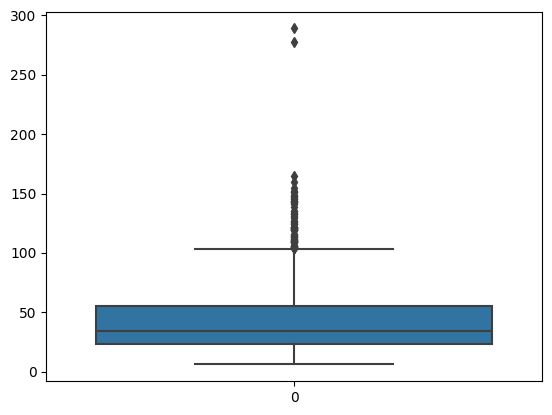

In [62]:
sns.boxplot(df['total sulfur dioxide'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


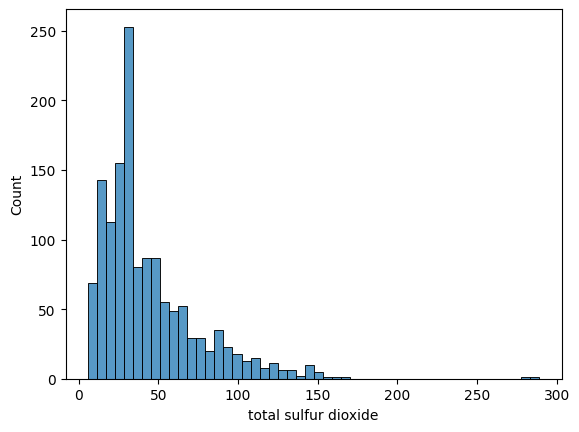

In [63]:
sns.histplot(df['total sulfur dioxide'])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


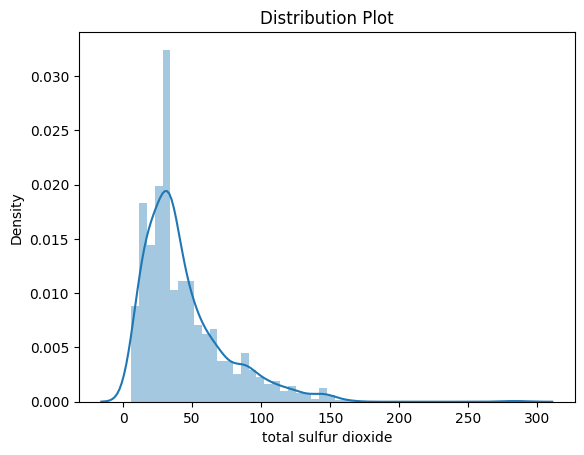

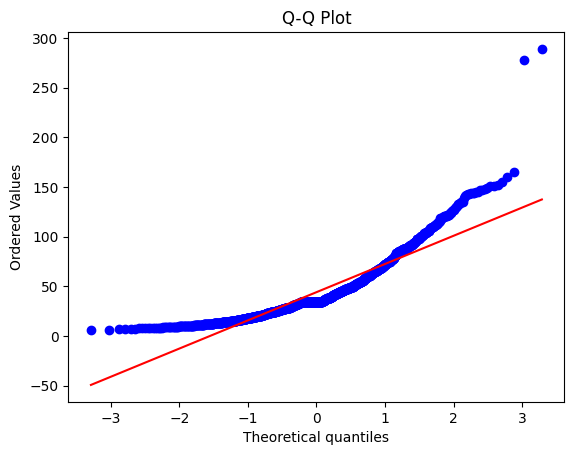

Column is non-Gaussian


In [64]:
check_gaussian(df['total sulfur dioxide'])

In [65]:
skewness = df['total sulfur dioxide'].skew()
skewness

np.float64(1.8792326415347875)

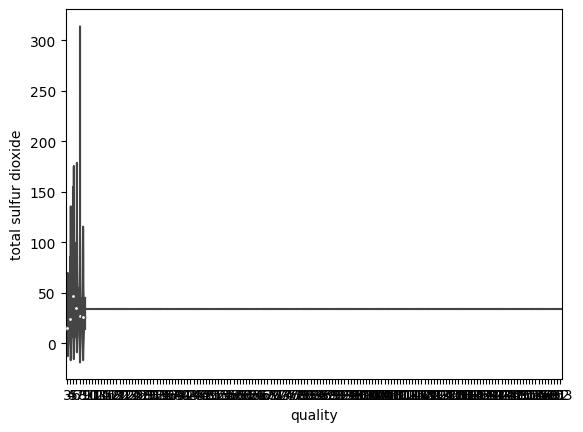

In [66]:
sns.violinplot(x = 'quality',y = 'total sulfur dioxide',data = df)
plt.show()

In [67]:
df['density'].value_counts()

density
0.99780    173
0.99760     26
0.99800     25
0.99720     22
0.99820     20
          ... 
0.99474      1
0.99483      1
0.99314      1
0.99574      1
0.99236      1
Name: count, Length: 432, dtype: int64

In [68]:
df['density'].unique()

array([0.9978 , 0.9968 , 0.9959 , 0.9965 , 0.9964 , 0.9982 , 0.9981 ,
       0.9961 , 0.9956 , 0.9953 , 0.9972 , 0.9958 , 0.9969 , 0.9971 ,
       0.997  , 0.9976 , 0.9974 , 0.9924 , 0.9948 , 0.99695, 0.9975 ,
       0.99545, 0.99615, 0.9994 , 0.99625, 0.9966 , 0.998  , 0.99585,
       0.99685, 0.9962 , 0.9967 , 0.9957 , 0.99655, 0.99525, 0.99815,
       0.99745, 0.9984 , 0.9927 , 0.99675, 0.99925, 0.99565, 1.00005,
       0.9983 , 0.9963 , 0.9985 , 0.9986 , 0.99965, 0.99575, 0.9999 ,
       1.00025, 0.9973 , 0.9987 , 0.9996 , 0.99935, 0.99735, 0.99915,
       0.9991 , 1.00015, 0.9997 , 1.001  , 0.9979 , 1.0014 , 1.0001 ,
       0.99855, 0.9993 , 0.99845, 0.996  , 0.9998 , 0.99645, 0.99865,
       0.9989 , 0.99975, 0.999  , 1.0015 , 1.0002 , 0.9992 , 1.0008 ,
       1.     , 1.0006 , 0.9955 , 1.0004 , 1.0018 , 0.9912 , 0.9988 ,
       1.0022 , 1.0003 , 0.9949 , 0.9952 , 0.9951 , 1.0032 , 0.9934 ,
       0.9947 , 0.9995 , 0.9977 , 1.0026 , 0.995  , 1.00315, 1.0021 ,
       0.9946 , 0.99

<Axes: >

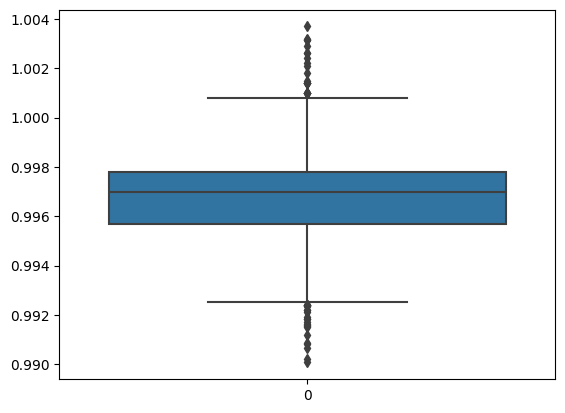

In [69]:
sns.boxplot(df['density'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='density', ylabel='Count'>

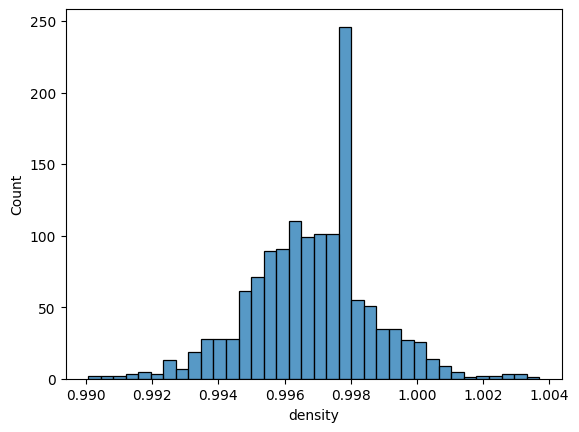

In [70]:
sns.histplot(df['density'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


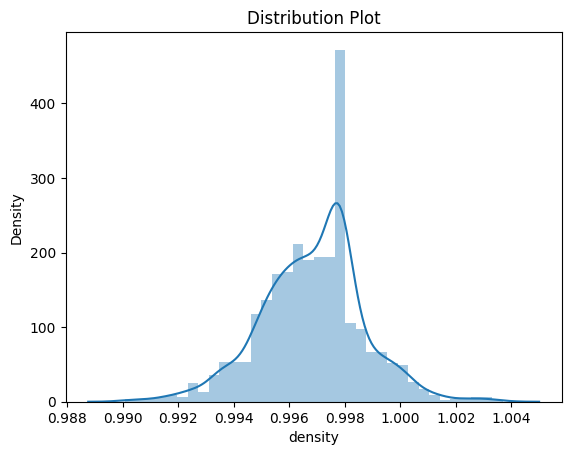

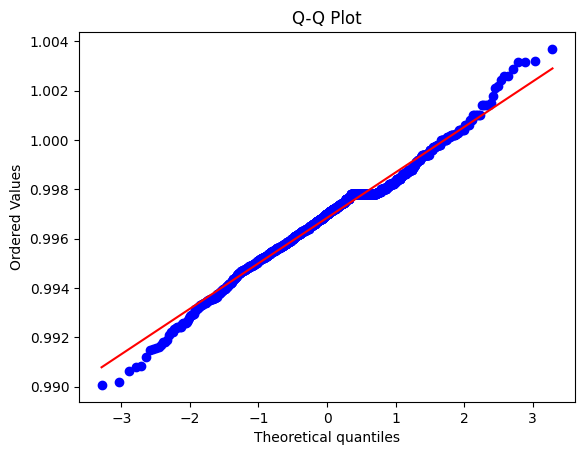

Column is non-Gaussian


In [71]:
check_gaussian(df['density'])

In [72]:
skewness = df['density'].skew()
skewness

np.float64(-0.12023934872672695)

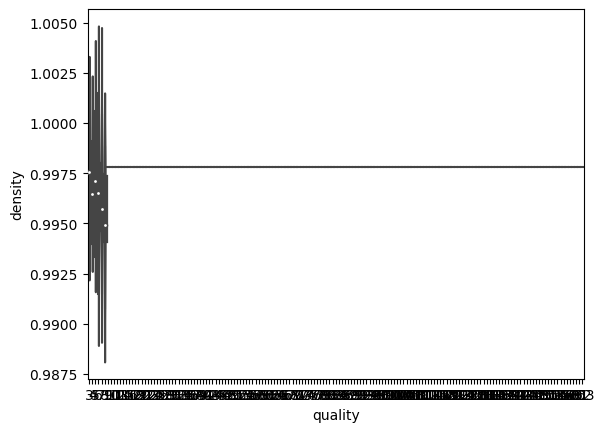

In [73]:
sns.violinplot(x = 'quality',y = 'density',data = df)
plt.show()

In [74]:
df['pH'].value_counts()

pH
3.51    170
3.30     42
3.26     41
3.36     40
3.38     36
       ... 
2.87      1
3.63      1
3.90      1
3.70      1
2.90      1
Name: count, Length: 85, dtype: int64

In [75]:
df['pH'].unique()

array([3.51, 3.59, 3.2 , 3.17, 3.33, 3.37, 3.19, 3.34, 3.47, 3.  , 3.36,
       3.29, 3.42, 3.35, 3.58, 3.48, 3.12, 3.44, 3.54, 3.52, 3.26, 3.39,
       3.23, 3.57, 3.28, 3.25, 3.46, 3.11, 3.22, 3.04, 3.31, 3.3 , 3.21,
       3.24, 3.14, 3.15, 3.32, 3.08, 3.07, 3.61, 3.38, 3.49, 3.06, 3.6 ,
       3.69, 3.1 , 3.41, 3.05, 3.16, 3.67, 3.68, 3.27, 3.18, 3.13, 3.02,
       3.55, 2.99, 3.01, 3.43, 3.56, 3.03, 3.62, 2.88, 2.95, 3.5 , 2.98,
       3.09, 2.86, 3.45, 3.74, 2.92, 3.72, 3.4 , 2.87, 2.89, 2.94, 3.63,
       3.9 , 3.66, 3.71, 3.53, 3.78, 3.7 , 4.01, 2.9 ])

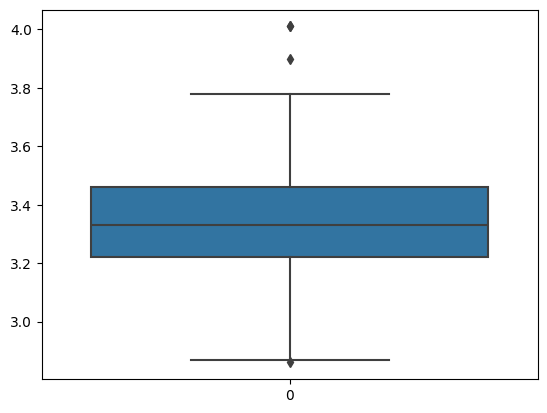

In [76]:
sns.boxplot(df['pH'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pH', ylabel='Count'>

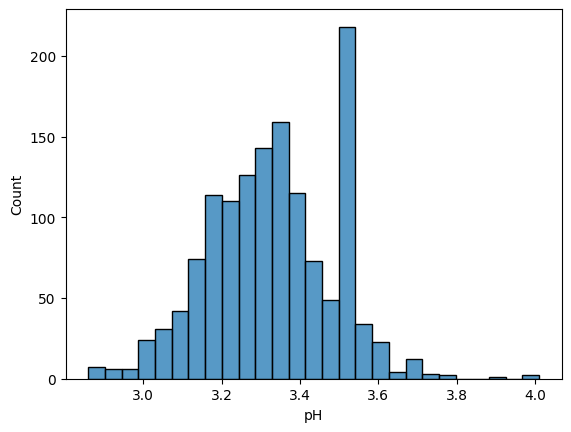

In [77]:
sns.histplot(df['pH'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


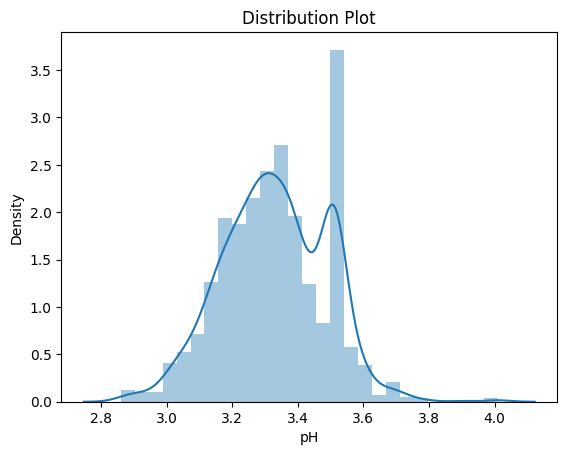

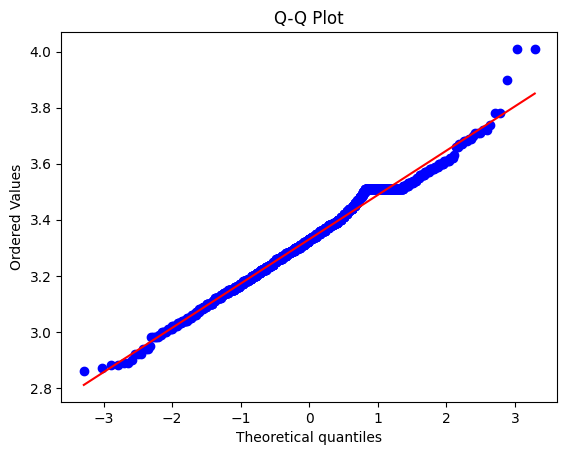

Column is non-Gaussian


In [78]:
check_gaussian(df['pH'])

In [79]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

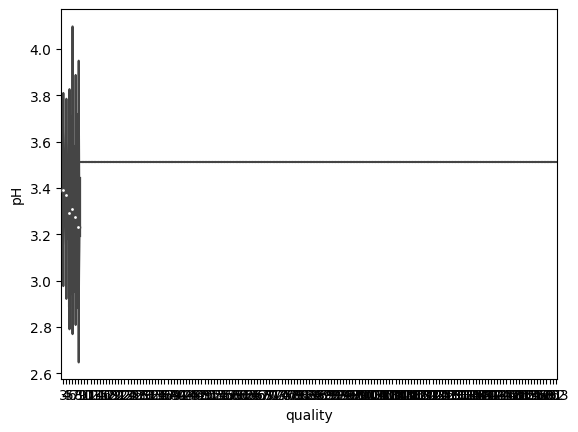

In [80]:
sns.violinplot(x = 'quality',y = 'pH',data = df)
plt.show()

In [81]:
df['sulphates'].value_counts()

sulphates
0.56    201
0.60     54
0.62     51
0.58     49
0.54     49
       ... 
1.16      1
1.34      1
1.15      1
1.33      1
1.01      1
Name: count, Length: 87, dtype: int64

In [82]:
df['sulphates'].unique()

array([0.56, 0.57, 1.08, 0.49, 0.62, 0.52, 0.48, 0.55, 1.59, 0.33, 0.61,
       0.47, 0.78, 0.59, 1.02, 0.58, 0.53, 0.54, 0.97, 0.85, 0.43, 0.82,
       1.03, 0.79, 0.77, 0.67, 0.88, 0.86, 0.71, 0.76, 0.6 , 1.61, 0.63,
       0.5 , 0.7 , 1.09, 0.84, 0.96, 0.45, 1.26, 0.8 , 0.65, 0.87, 0.72,
       0.91, 0.64, 0.95, 0.81, 0.73, 0.68, 0.69, 0.74, 0.83, 0.66, 1.  ,
       1.36, 1.18, 0.75, 0.89, 0.93, 0.92, 0.98, 1.13, 1.04, 1.11, 0.99,
       0.51, 1.07, 0.44, 0.9 , 1.06, 1.05, 0.42, 1.14, 0.46, 1.17, 1.62,
       0.94, 0.39, 1.34, 1.16, 1.1 , 0.4 , 1.15, 0.37, 1.33, 1.01])

<Axes: >

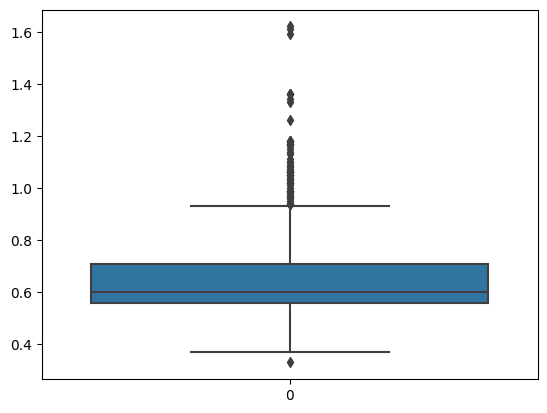

In [83]:
sns.boxplot(df['sulphates'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sulphates', ylabel='Count'>

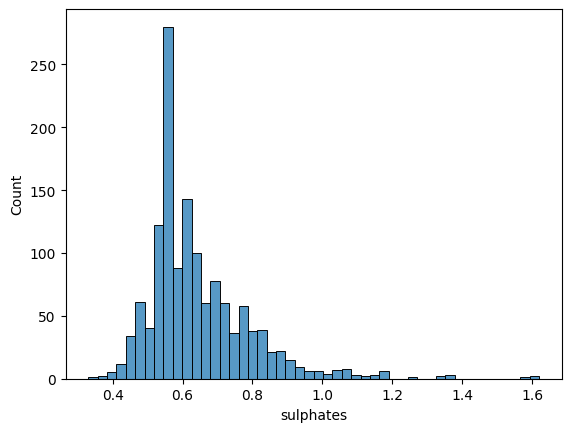

In [84]:
sns.histplot(df['sulphates'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


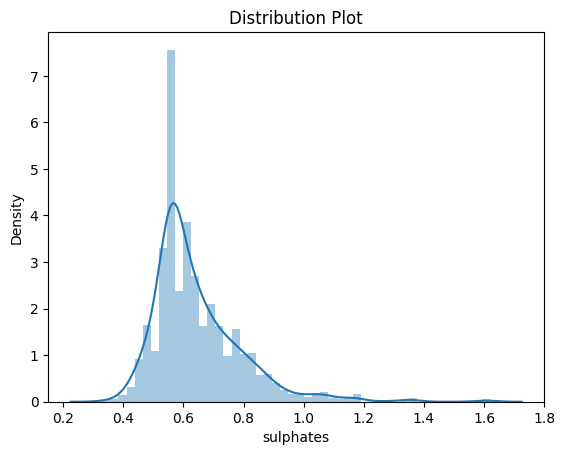

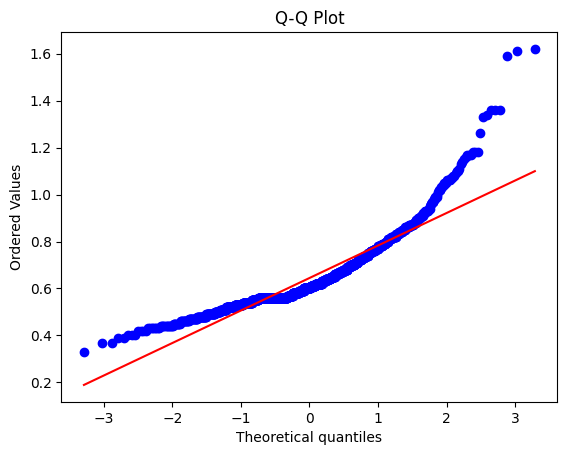

Column is non-Gaussian


In [85]:
check_gaussian(df['sulphates'])

In [86]:
skewness = df['sulphates'].skew()
skewness

np.float64(1.8579048237117712)

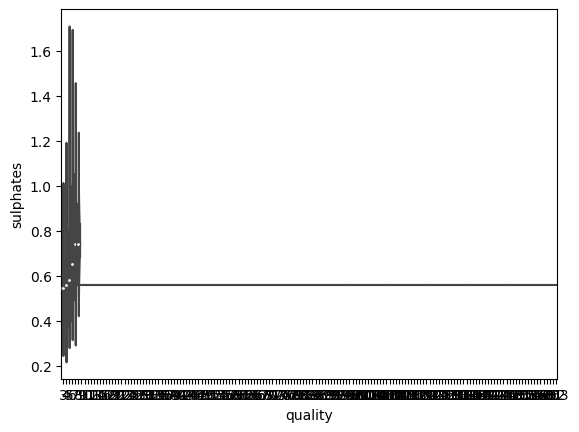

In [87]:
sns.violinplot(x = 'quality',y = 'sulphates',data = df)
plt.show()

In [88]:
df['alcohol'].value_counts()

alcohol
9.400000     228
9.500000      93
10.000000     57
9.800000      51
9.200000      48
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64

In [89]:
df['alcohol'].unique()

array([ 9.4       ,  9.3       ,  9.6       ,  9.2       , 10.        ,
        9.5       , 10.2       ,  9.        , 10.4       ,  9.1       ,
       11.5       , 10.5       ,  9.7       ,  9.8       , 10.1       ,
       13.        , 11.4       , 10.3       , 10.8       , 12.4       ,
       11.        , 12.2       ,  9.9       , 10.9       , 12.8       ,
       10.7       , 12.6       , 10.6       , 12.5       , 11.7       ,
       11.3       , 12.3       , 12.        , 11.9       , 11.8       ,
        8.7       , 13.3       , 12.9       , 11.2       , 11.6       ,
       11.1       , 13.4       , 14.        , 12.1       ,  8.4       ,
       12.7       , 14.9       , 13.2       , 13.6       , 13.1       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

<Axes: >

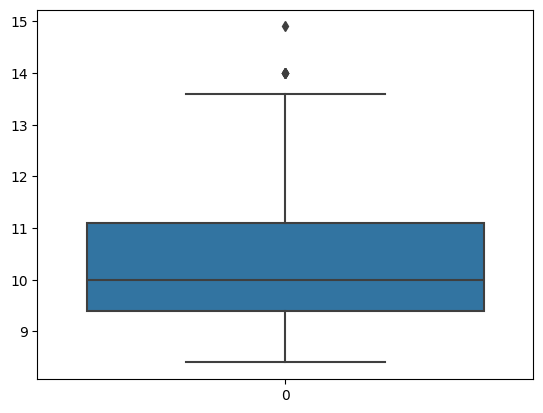

In [90]:
sns.boxplot(df['alcohol'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


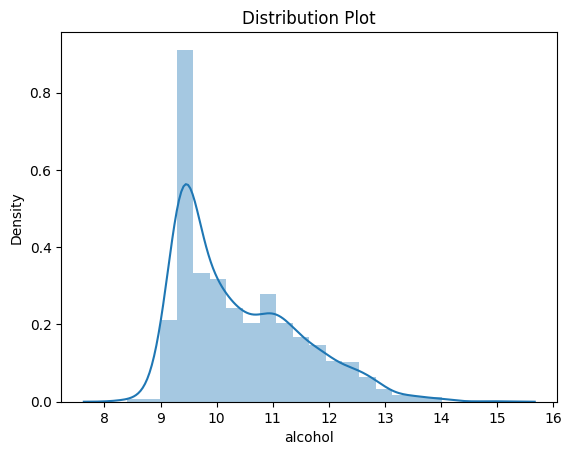

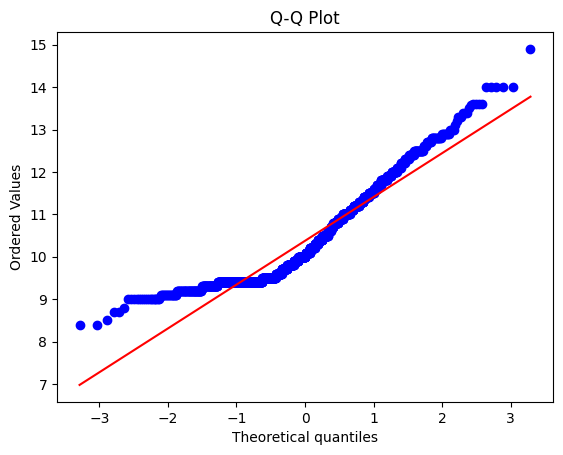

Column is non-Gaussian


In [91]:
check_gaussian(df['alcohol'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='alcohol', ylabel='Count'>

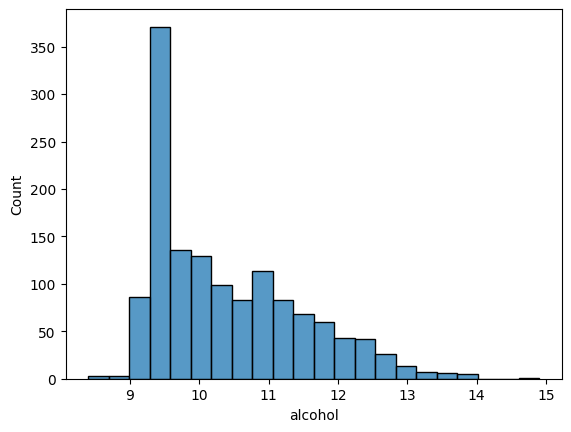

In [92]:
sns.histplot(df['alcohol'])

In [93]:
skewness = df['alcohol'].skew()
skewness

np.float64(0.9083108271618813)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='alcohol', ylabel='Density'>

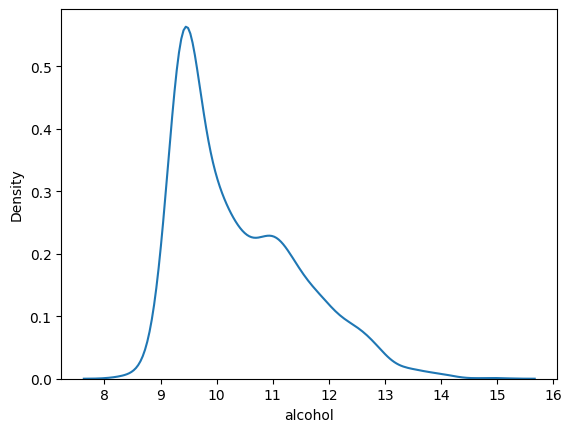

In [94]:
sns.kdeplot(df['alcohol'])

In [95]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [96]:
df['quality'].unique()

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163,   4,   3])

In [97]:
df['quality'].value_counts()

quality
6      500
5      488
7      162
4       45
8       18
      ... 
159      1
161      1
160      1
163      1
162      1
Name: count, Length: 161, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\4165335460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


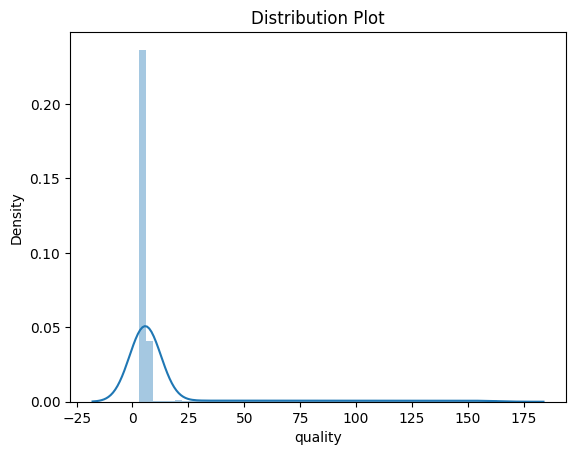

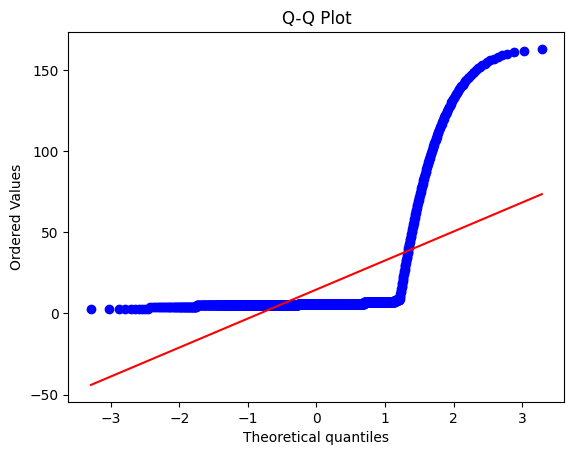

Column is non-Gaussian


In [98]:
check_gaussian(df['quality'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='quality', ylabel='Count'>

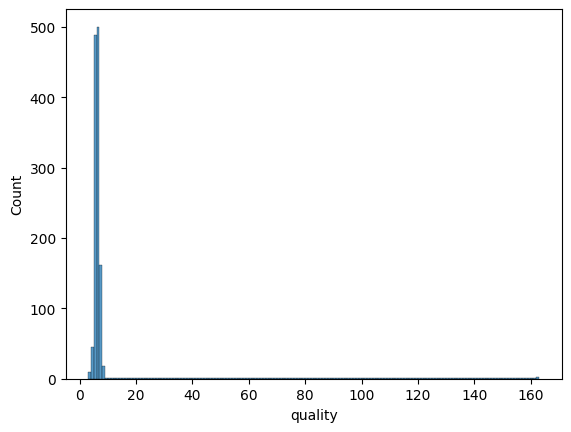

In [99]:
sns.histplot(df['quality'])

<Axes: >

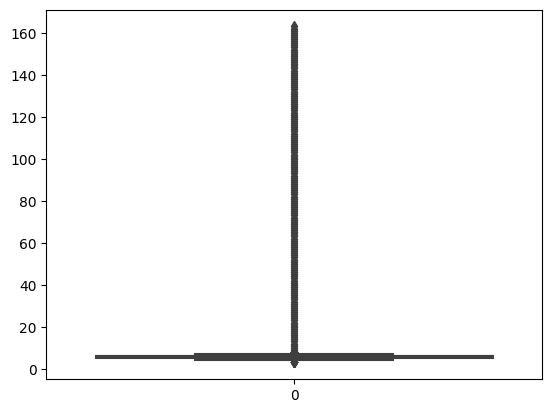

In [100]:
sns.boxplot(df['quality'])

<Axes: >

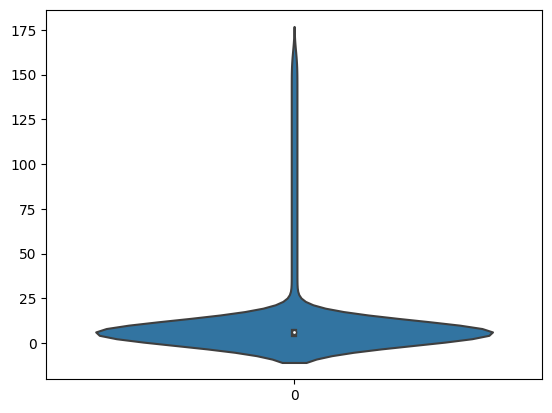

In [101]:
sns.violinplot(df['quality'])

- we are having the outliers in the columns as:
1. fixied acidity
2. volatile acidity
3. residual sugar
4. alchocol
5. sulphates
6. pH
7. density
8. total sulfur dioxide.
9.free sulfur dioxide
10. chloridies.

In [103]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [104]:
df.shape

(1378, 12)

In [105]:
Q1 = df['volatile acidity'].quantile(0.25)
Q3 = df['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['volatile acidity'] < lower) | (df['volatile acidity'] > upper)]
print(outliers.shape)

(4, 12)


In [110]:
def detect_outliers_iqr(data, col):
    Q1 = df['volatile acidity'].quantile(0.25)
    Q3 = df['volatile acidity'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['volatile acidity'] < lower) | (df['volatile acidity'] > upper)]
    return outliers


In [111]:
outliers = detect_outliers_iqr(df, 'volatile acidity')
print(outliers[['volatile acidity']])
print(outliers.shape)

      volatile acidity
672              1.240
690              1.185
1299             1.580
1312             1.180
(4, 12)


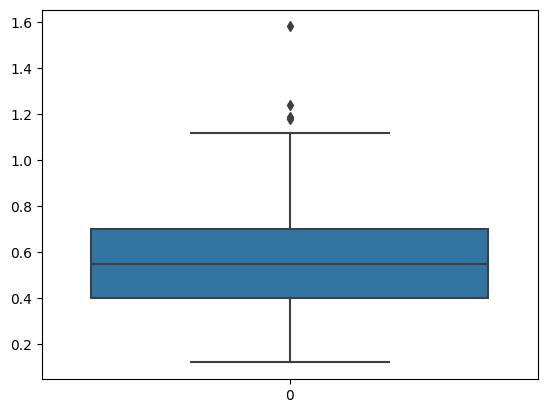

In [112]:
sns.boxplot(data = df['volatile acidity'])
plt.show()

In [115]:
def replace_outliers_with_median(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = data[col].median()
    
    # Replace outliers with median
    data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)


In [116]:
replace_outliers_with_median(df, 'volatile acidity')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)


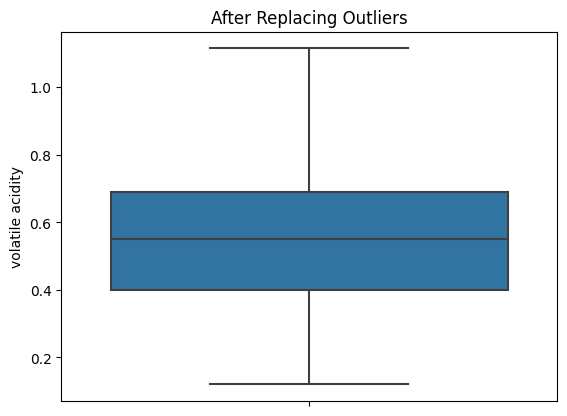

In [117]:
sns.boxplot(data=df, y='volatile acidity')
plt.title("After Replacing Outliers")
plt.show()

In [118]:
def replace_outliers_with_median(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = data[col].median()
    
    # Replace outliers with median
    data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)


In [119]:
replace_outliers_with_median(df, 'fixed acidity')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)


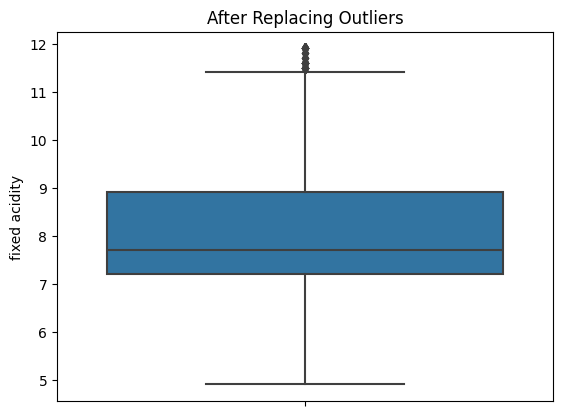

In [120]:
sns.boxplot(data=df, y='fixed acidity')
plt.title("After Replacing Outliers")
plt.show()

In [121]:
def replace_outliers_with_median(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = data[col].median()
    
    # Replace outliers with median
    data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)


In [122]:
replace_outliers_with_median(df, 'residual sugar')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)


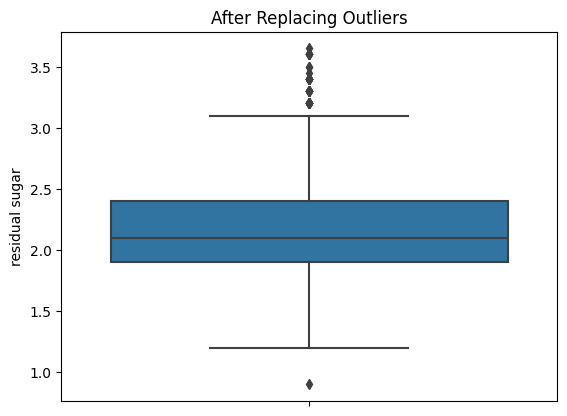

In [123]:
sns.boxplot(data=df, y='residual sugar')
plt.title("After Replacing Outliers")
plt.show()

In [124]:
def replace_outliers_with_median(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = data[col].median()
    
    # Replace outliers with median
    data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)


In [125]:
outlier_cols = [
    'fixed acidity', 'volatile acidity', 'residual sugar', 'alcohol',
    'sulphates', 'pH', 'density', 'total sulfur dioxide',
    'free sulfur dioxide', 'chlorides'
]

for col in outlier_cols:
    replace_outliers_with_median(df, col)

print("Outliers replaced successfully.")


Outliers replaced successfully.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on

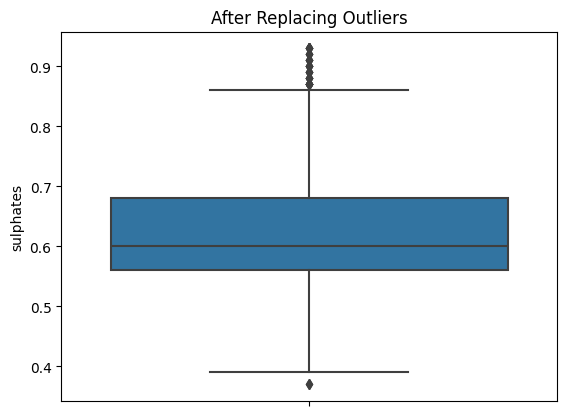

In [126]:
sns.boxplot(data=df, y='sulphates')
plt.title("After Replacing Outliers")
plt.show()

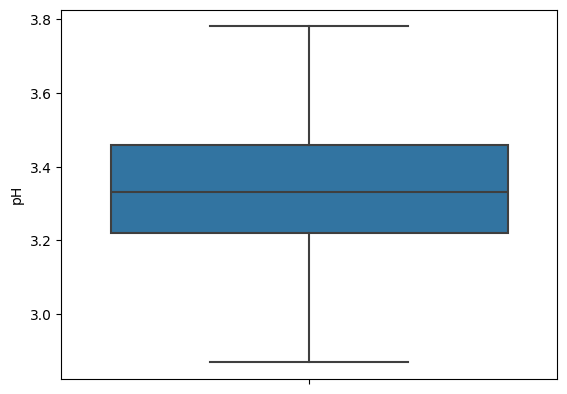

In [127]:
sns.boxplot(data = df,y = 'pH')
plt.show()

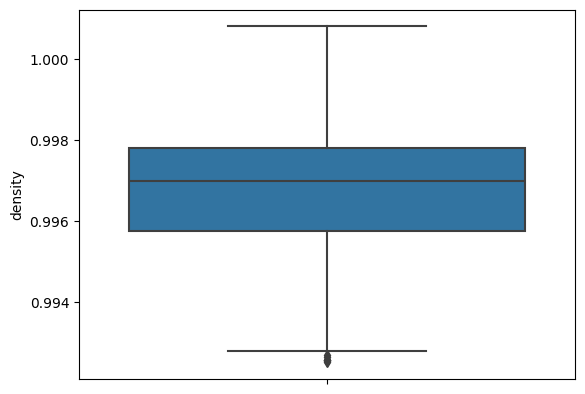

In [128]:
sns.boxplot(data = df, y = 'density')
plt.show()

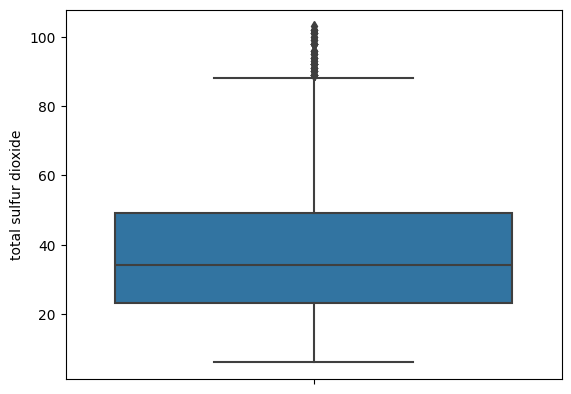

In [129]:
sns.boxplot(data = df, y = 'total sulfur dioxide')
plt.show()

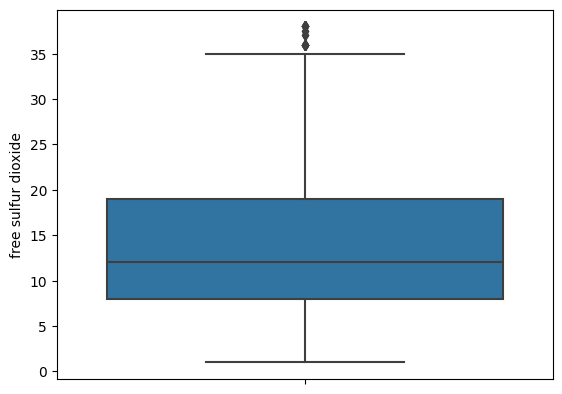

In [130]:
sns.boxplot(data = df, y = 'free sulfur dioxide')
plt.show()

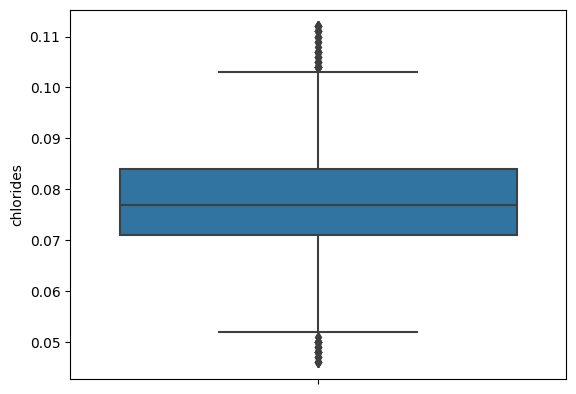

In [132]:
sns.boxplot(data = df , y = 'chlorides')
plt.show()

In [134]:
# Run again to recheck and replace remaining outliers
for col in [
    'fixed acidity', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide',
    'chlorides', 'alcohol', 'residual sugar', 'density'
]:
    replace_outliers_with_median(df, col)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: median if x < lower or x > upper else x)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\3275100448.py:10: SettingWithCopyWarning: 
A value is trying to be set on

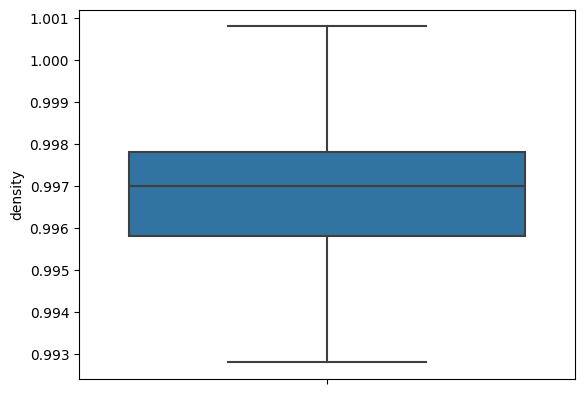

In [136]:
sns.boxplot(data = df, y = 'density')
plt.show()

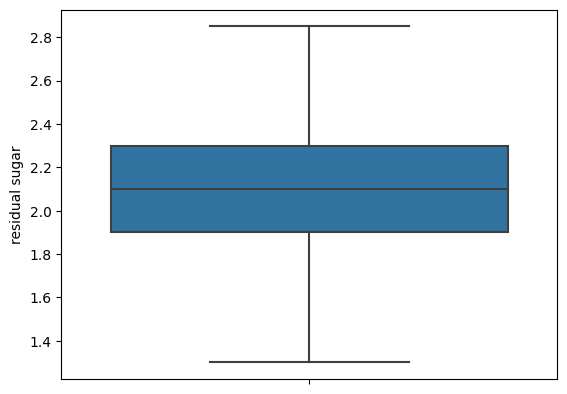

In [137]:
sns.boxplot(data = df, y = 'residual sugar')
plt.show()

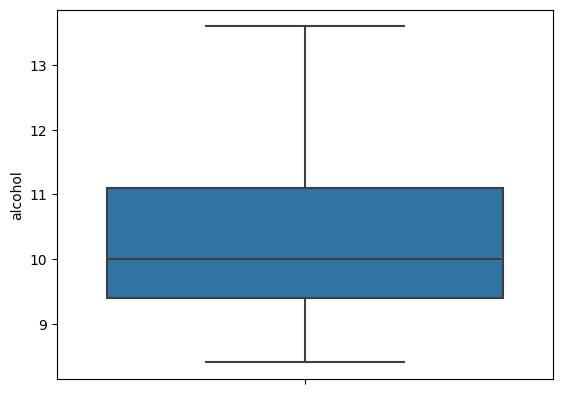

In [138]:
sns.boxplot(data = df, y = 'alcohol')
plt.show()

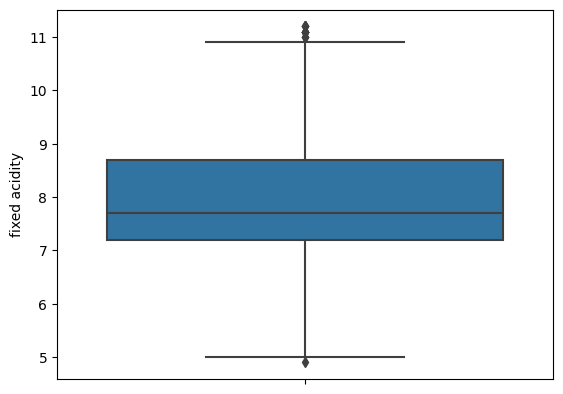

In [139]:
sns.boxplot(data = df, y = 'fixed acidity')
plt.show()

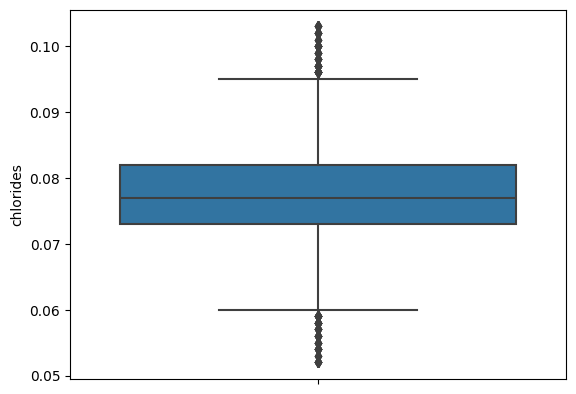

In [140]:
sns.boxplot(data = df, y = 'chlorides')
plt.show()

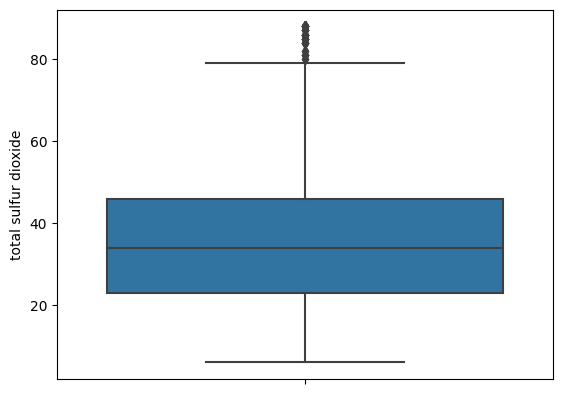

In [141]:
sns.boxplot(data = df, y = 'total sulfur dioxide')
plt.show()

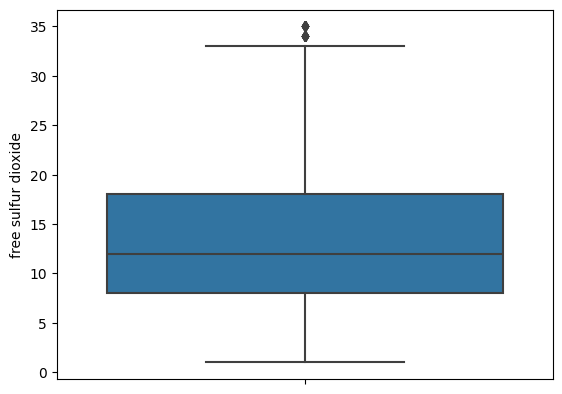

In [142]:
sns.boxplot(data = df, y = 'free sulfur dioxide')
plt.show()

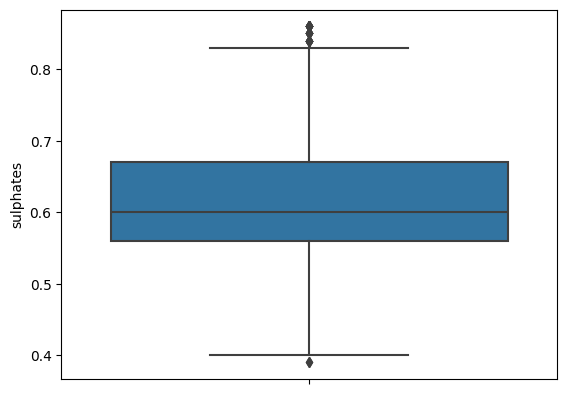

In [143]:
sns.boxplot(data = df, y = 'sulphates')
plt.show()

In [144]:
def cap_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap values
    data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)


In [145]:
columns_with_persistent_outliers = [
    'fixed acidity', 'sulphates', 'total sulfur dioxide',
    'free sulfur dioxide', 'chlorides'
]

for col in columns_with_persistent_outliers:
    cap_outliers_iqr(df, col)

print("Capping applied to selected columns.")

Capping applied to selected columns.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\1087870491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\1087870491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11688\1087870491.py:9: SettingWithCopyWarning: 
A value is tr

In [ ]:
for col in columns_with_persistent_outliers:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of '{col}' After Capping")
    plt.grid(True)
    plt.show()

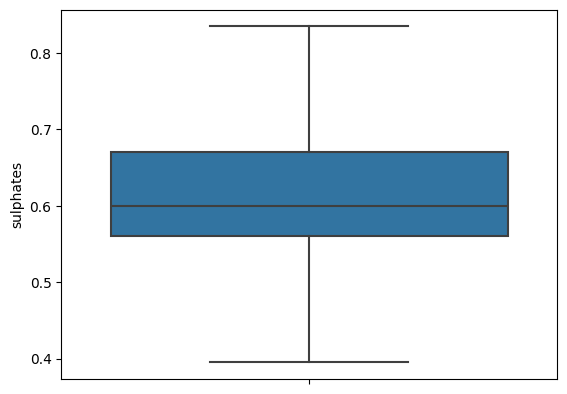

In [147]:
sns.boxplot(data = df , y = 'sulphates')
plt.show()

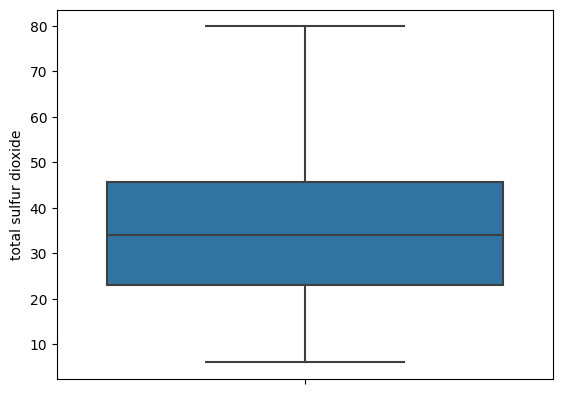

In [148]:
sns.boxplot(data = df, y = 'total sulfur dioxide')
plt.show()

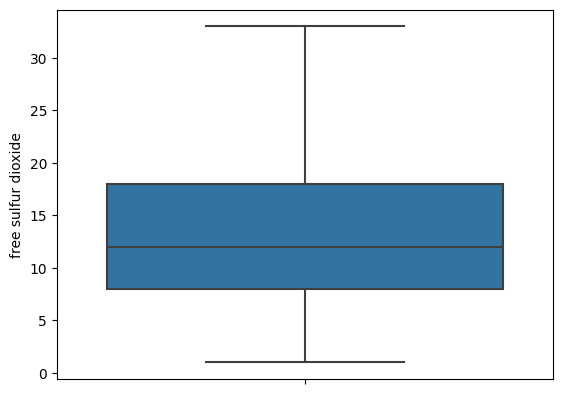

In [149]:
sns.boxplot(data = df, y = 'free sulfur dioxide')
plt.show()

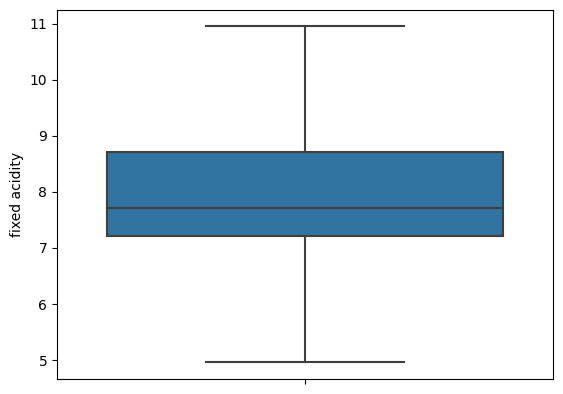

In [150]:
sns.boxplot(data = df, y = 'fixed acidity')
plt.show()

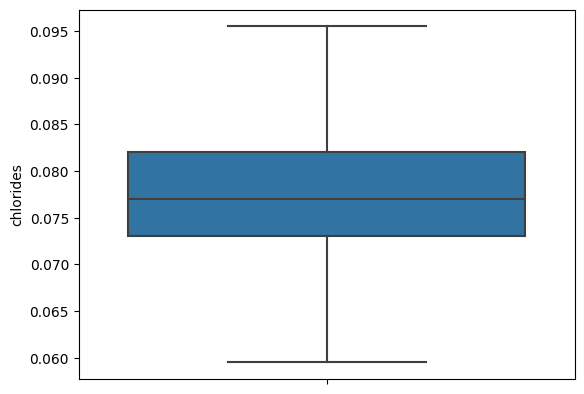

In [152]:
sns.boxplot(data = df, y = 'chlorides')
plt.show()

# Bivariate Analysis

In [154]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

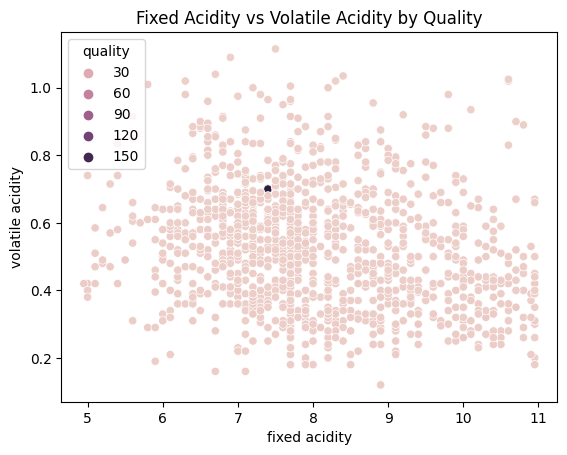

In [155]:
sns.scatterplot(data=df, x='fixed acidity', y='volatile acidity', hue='quality')
plt.title("Fixed Acidity vs Volatile Acidity by Quality")
plt.show()

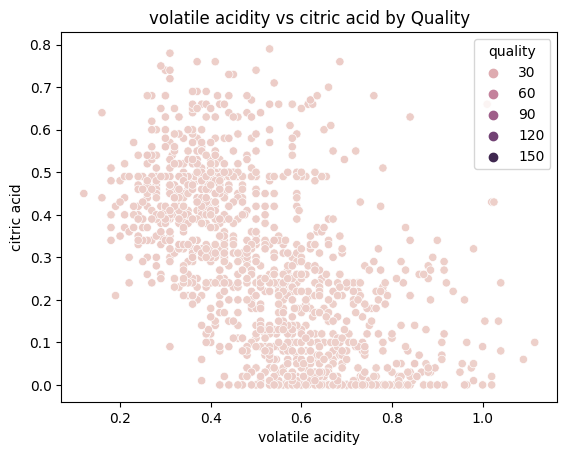

In [156]:
sns.scatterplot(data=df, x='volatile acidity', y='citric acid', hue='quality')
plt.title("volatile acidity vs citric acid by Quality")
plt.show()

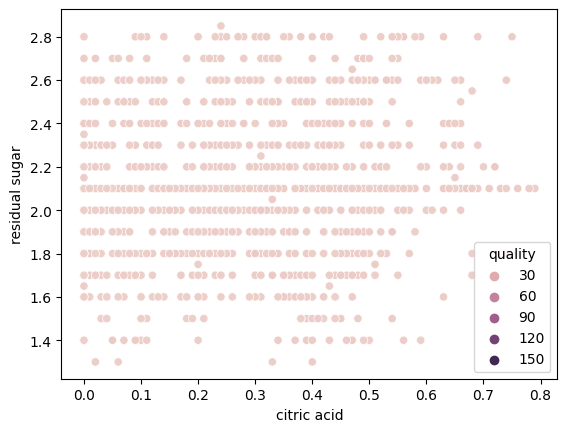

In [157]:
sns.scatterplot(data = df, x = 'citric acid', y = 'residual sugar',hue = 'quality')
plt.show()

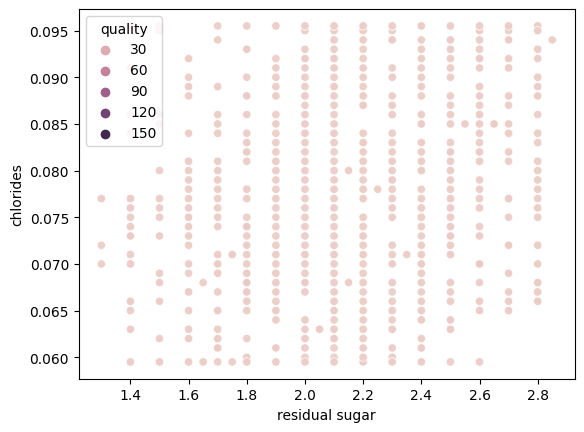

In [158]:
sns.scatterplot(data = df, x = 'residual sugar', y = 'chlorides',hue = 'quality')
plt.show()

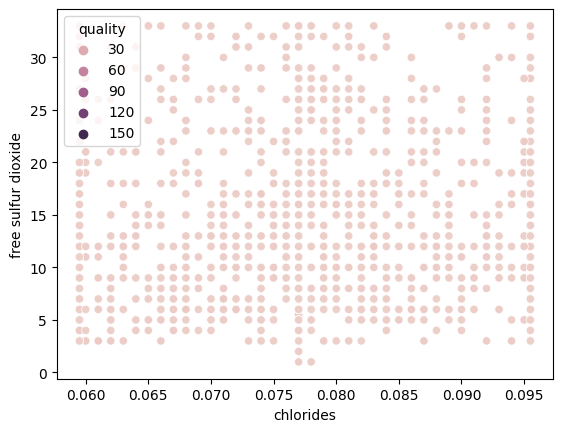

In [159]:
sns.scatterplot(data = df, x = 'chlorides', y = 'free sulfur dioxide', hue = 'quality')
plt.show()

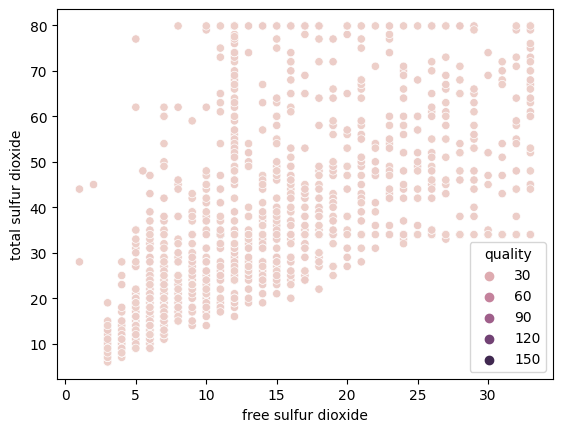

In [160]:
sns.scatterplot(data = df, x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'quality')
plt.show()

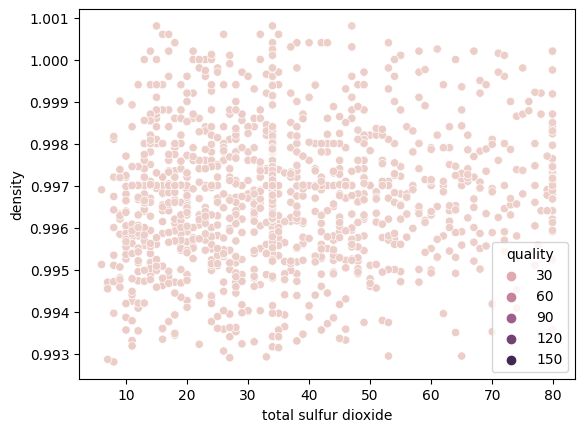

In [161]:
sns.scatterplot(data = df, x = 'total sulfur dioxide', y = 'density', hue = 'quality')
plt.show()

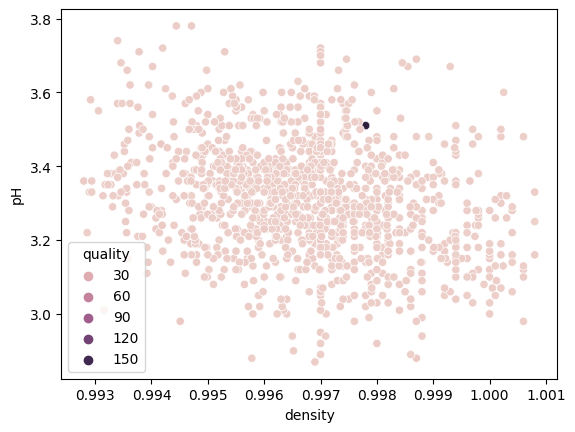

In [162]:
sns.scatterplot(data = df, x = 'density', y = 'pH', hue = 'quality')
plt.show()

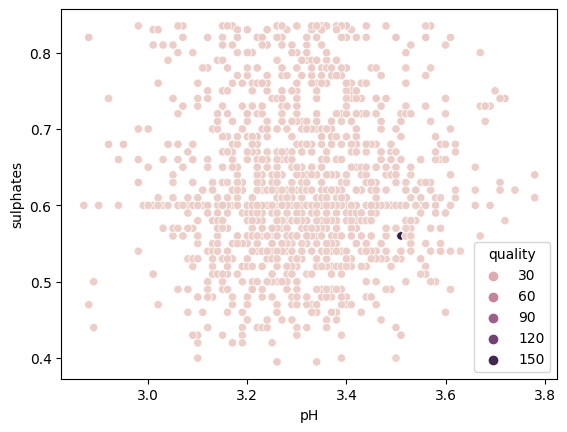

In [163]:
sns.scatterplot(data = df, x = 'pH', y ='sulphates',hue = 'quality' )
plt.show()

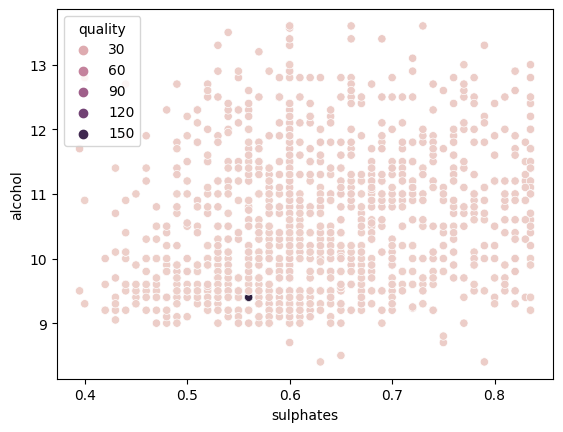

In [164]:
sns.scatterplot(data = df, x = 'sulphates', y = 'alcohol', hue = 'quality')
plt.show()

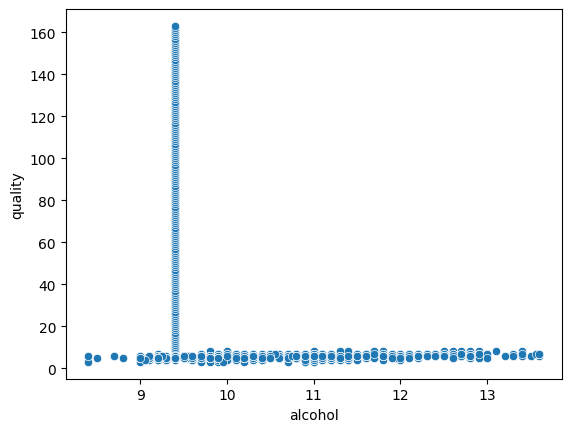

In [165]:
sns.scatterplot(data = df, x = 'alcohol', y = 'quality')
plt.show()

In [170]:
import pandas as pd
from scipy.stats import ttest_ind

# Load your dataset
df = pd.read_csv("winequality-red.csv")

# Step 1: Convert quality to binary
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Step 2: Create groups
group0 = df[df['quality'] == 0]
group1 = df[df['quality'] == 1]

# Step 3: Run t-tests
t_test_results = {}

for col in df.columns[:-1]:  # exclude 'quality'
    if group0[col].std() == 0 or group1[col].std() == 0:
        t_test_results[col] = ("undefined", "undefined")
    else:
        t_stat, p_val = ttest_ind(group0[col], group1[col], equal_var=False)
        t_test_results[col] = (round(t_stat, 3), round(p_val, 4))

# Step 4: Show results
print("T-Test Results (T-Statistic, P-Value):")
for feature, result in t_test_results.items():
    print(f"{feature}: t = {result[0]}, p = {result[1]}")


T-Test Results (T-Statistic, P-Value):
fixed acidity: t = -1.065, p = 0.2873
volatile acidity: t = 8.884, p = 0.0
citric acid: t = -1.605, p = 0.1087
residual sugar: t = 1.753, p = 0.0799
chlorides: t = 4.375, p = 0.0
free sulfur dioxide: t = 3.871, p = 0.0001
total sulfur dioxide: t = 8.857, p = 0.0
density: t = 4.863, p = 0.0
pH: t = -4.1, p = 0.0
sulphates: t = -8.796, p = 0.0
alcohol: t = -14.56, p = 0.0


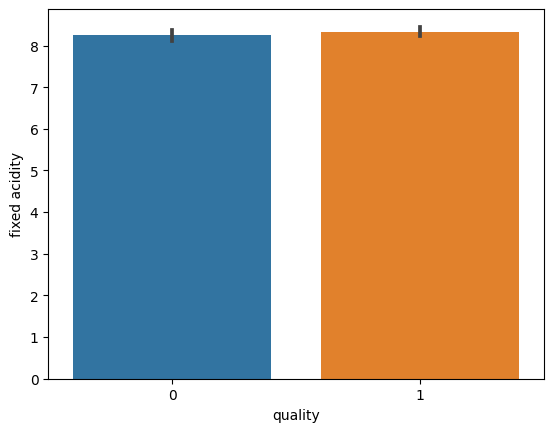

In [171]:
sns.barplot(x=df['quality'],y=df['fixed acidity'])
plt.show()

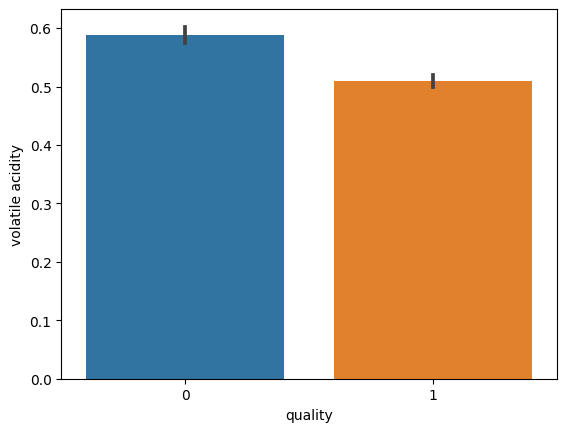

In [172]:
sns.barplot(x=df['quality'],y=df['volatile acidity'])
plt.show()

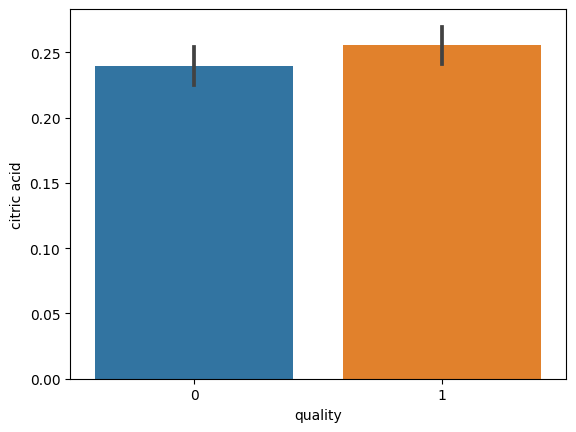

In [173]:
sns.barplot(x=df['quality'],y=df['citric acid'])
plt.show()

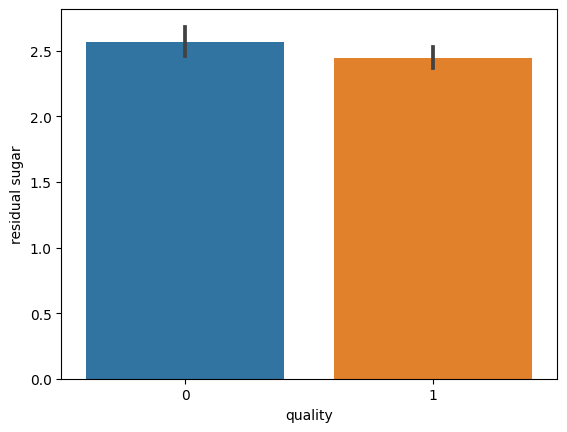

In [174]:
sns.barplot(x=df['quality'],y=df['residual sugar'])
plt.show()

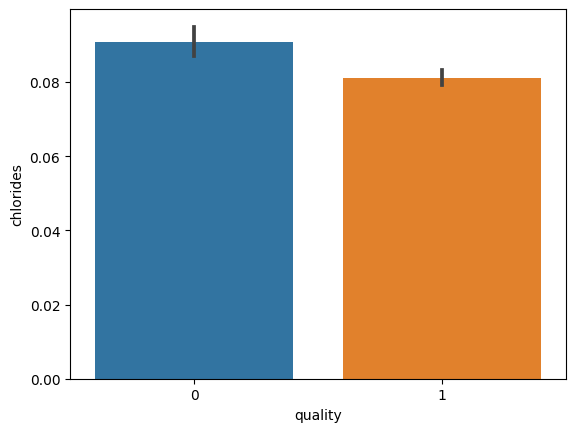

In [175]:
sns.barplot(x=df['quality'],y=df['chlorides'])
plt.show()

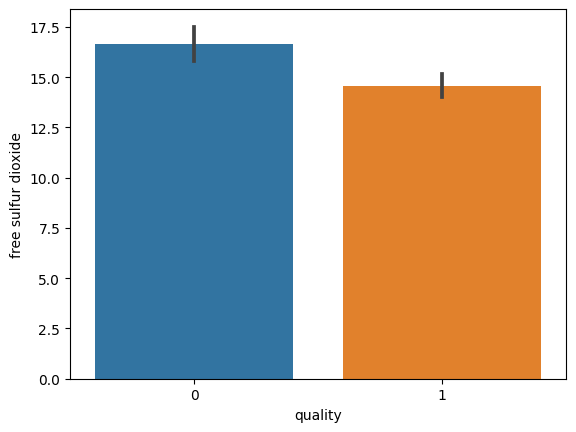

In [176]:
sns.barplot(x=df['quality'],y=df['free sulfur dioxide'])
plt.show()

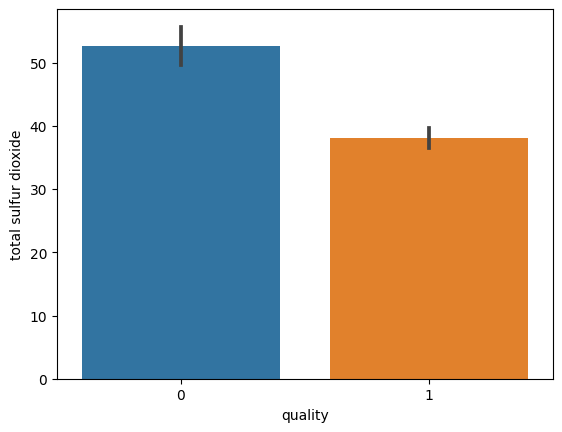

In [177]:
sns.barplot(x=df['quality'],y=df['total sulfur dioxide'])
plt.show()

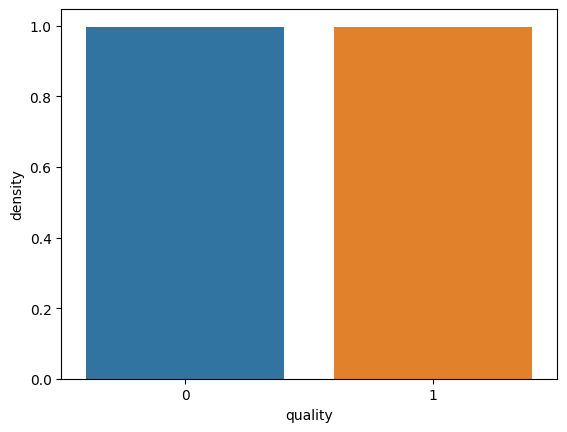

In [178]:
sns.barplot(x=df['quality'],y=df['density'])
plt.show()

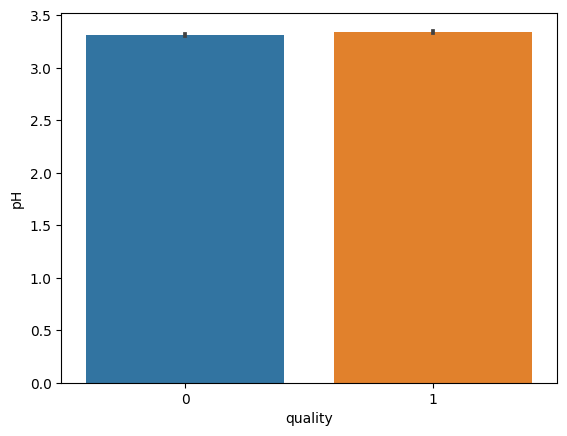

In [179]:
sns.barplot(x=df['quality'],y=df['pH'])
plt.show()

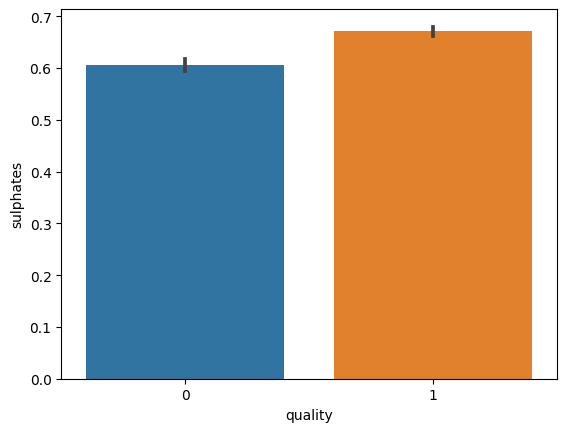

In [180]:
sns.barplot(x=df['quality'],y=df['sulphates'])
plt.show()

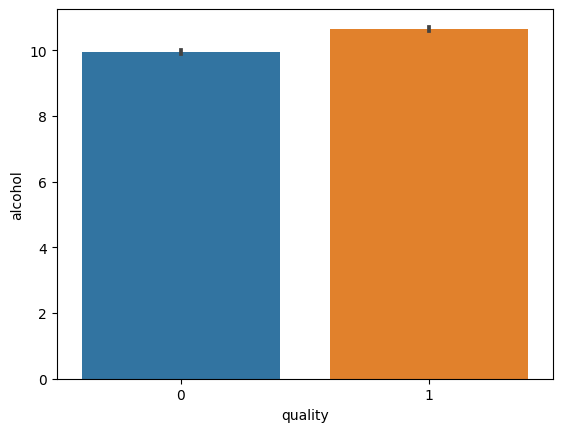

In [181]:
sns.barplot(x=df['quality'],y=df['alcohol'])
plt.show()

# Multivariate Analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

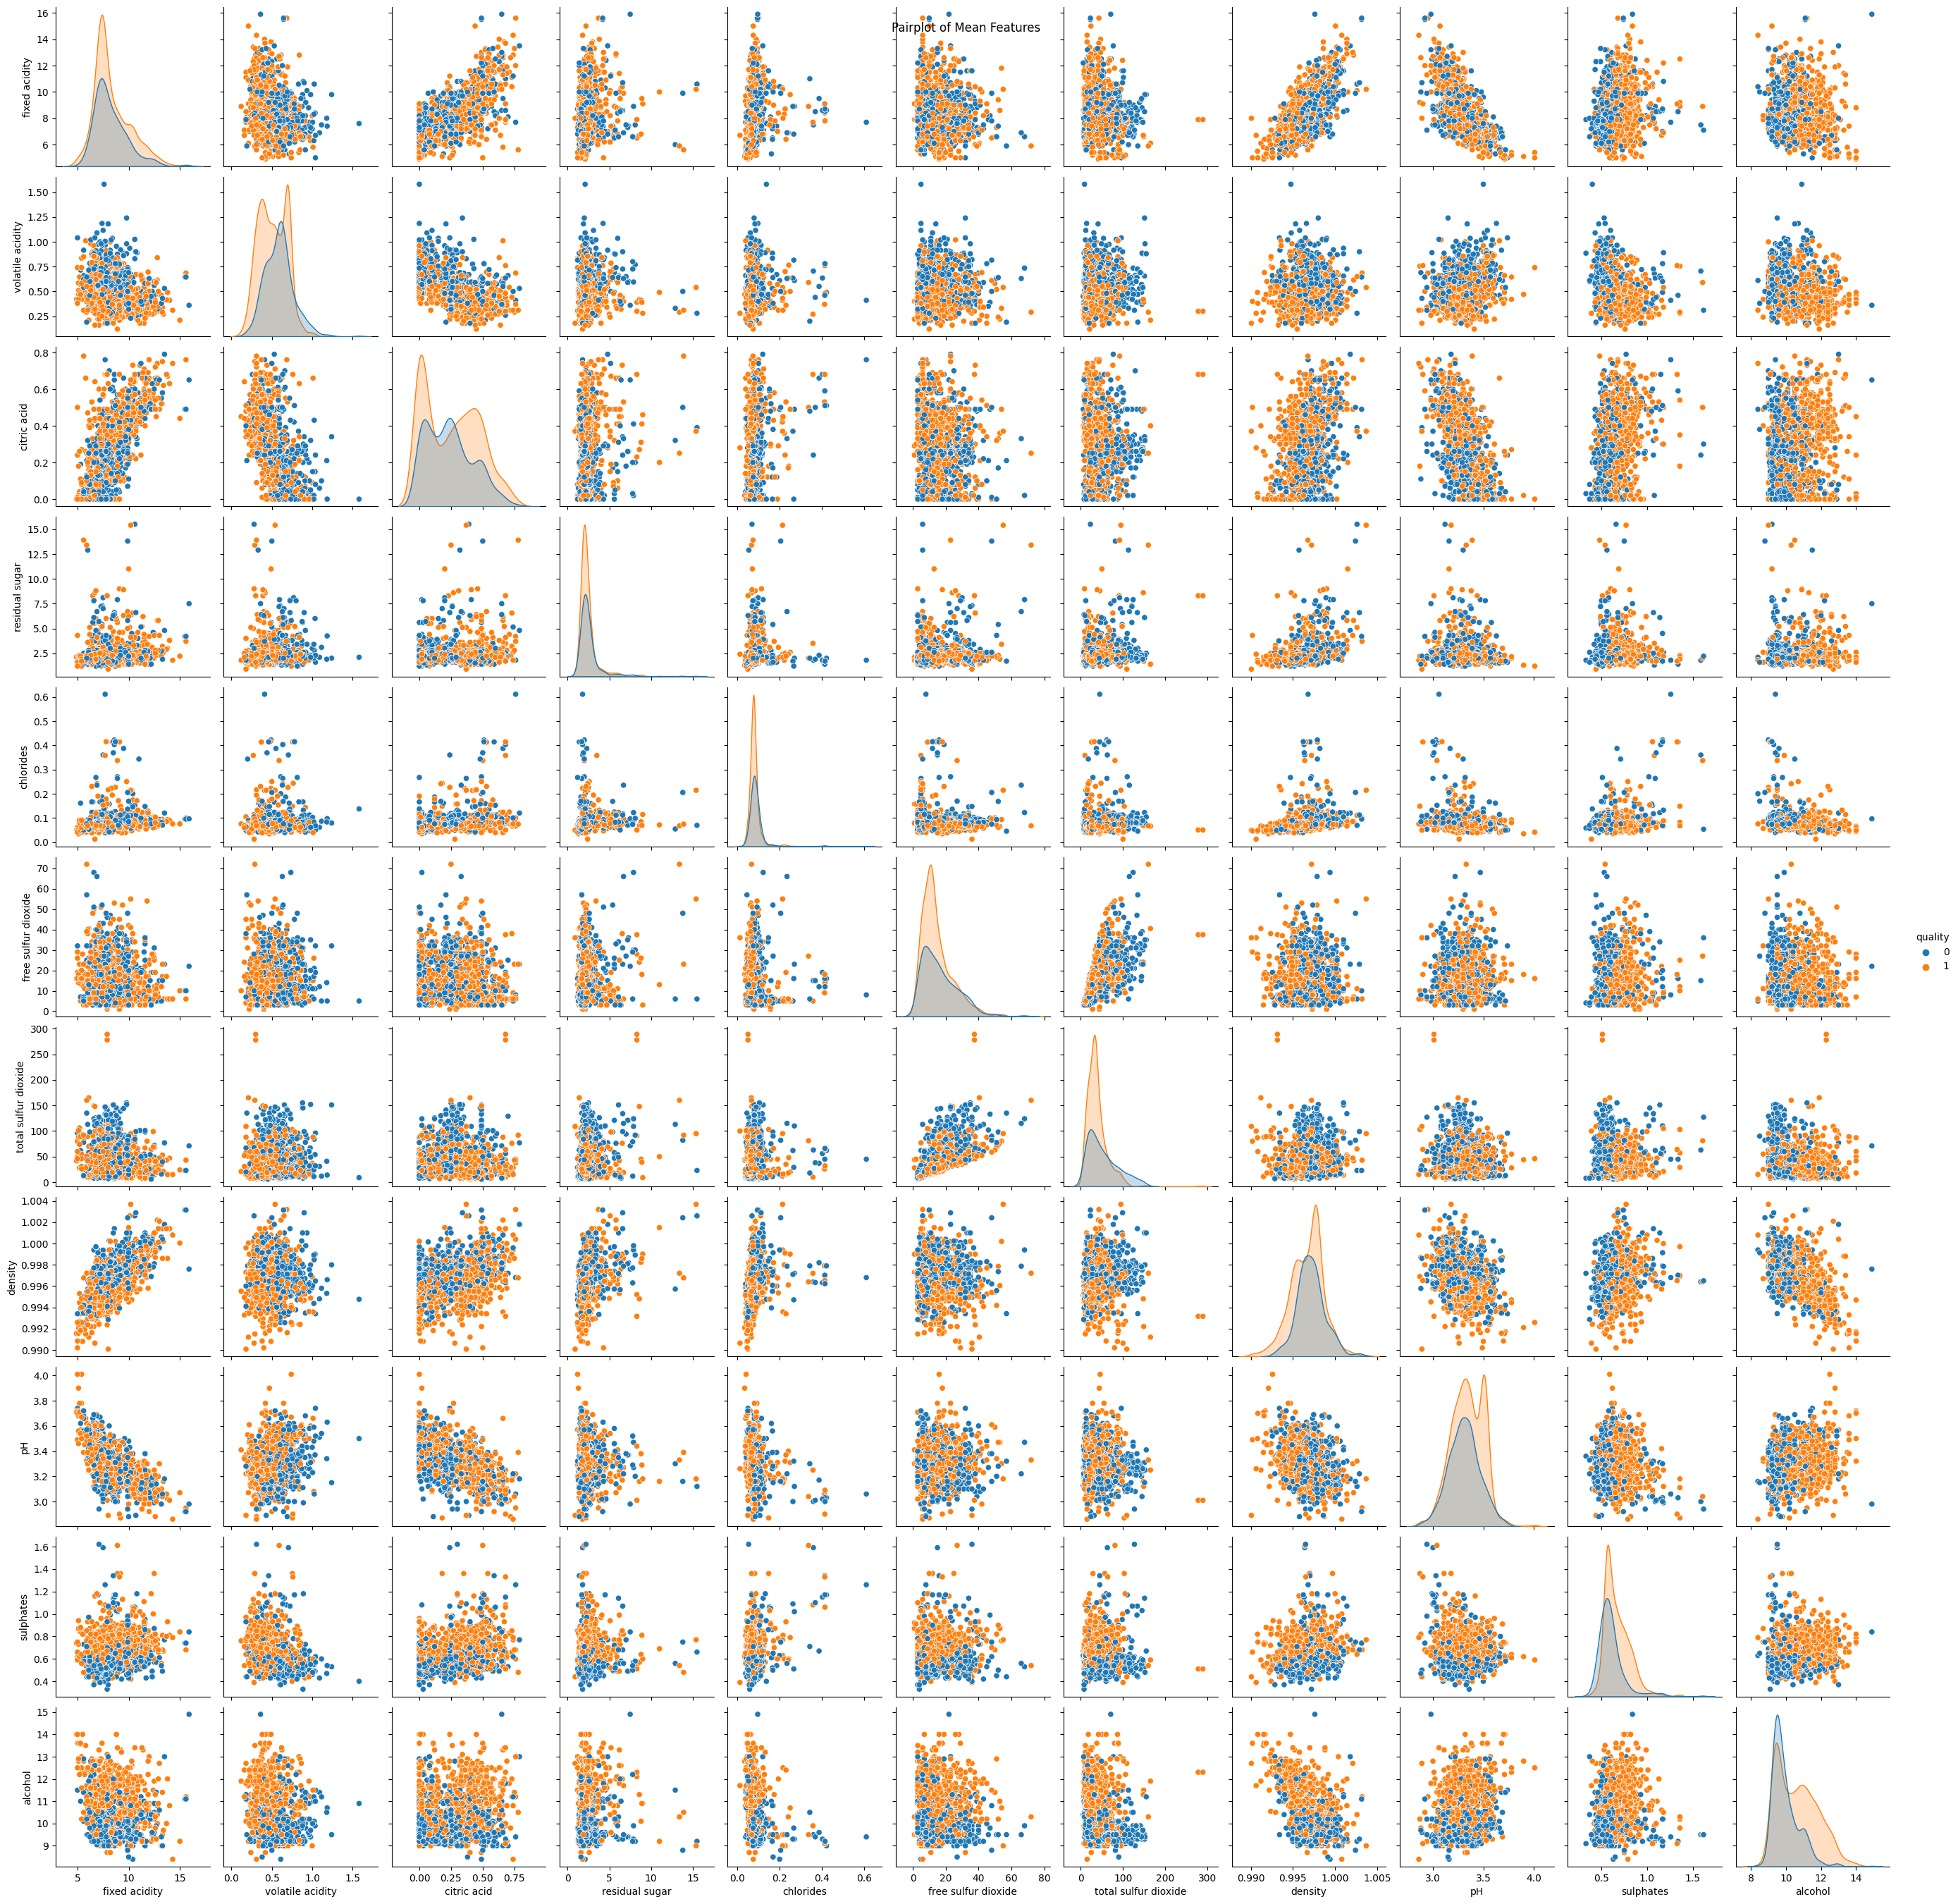

In [182]:
sns.pairplot(data = df, hue = 'quality')
plt.suptitle('Pairplot of Mean Features')
plt.show()

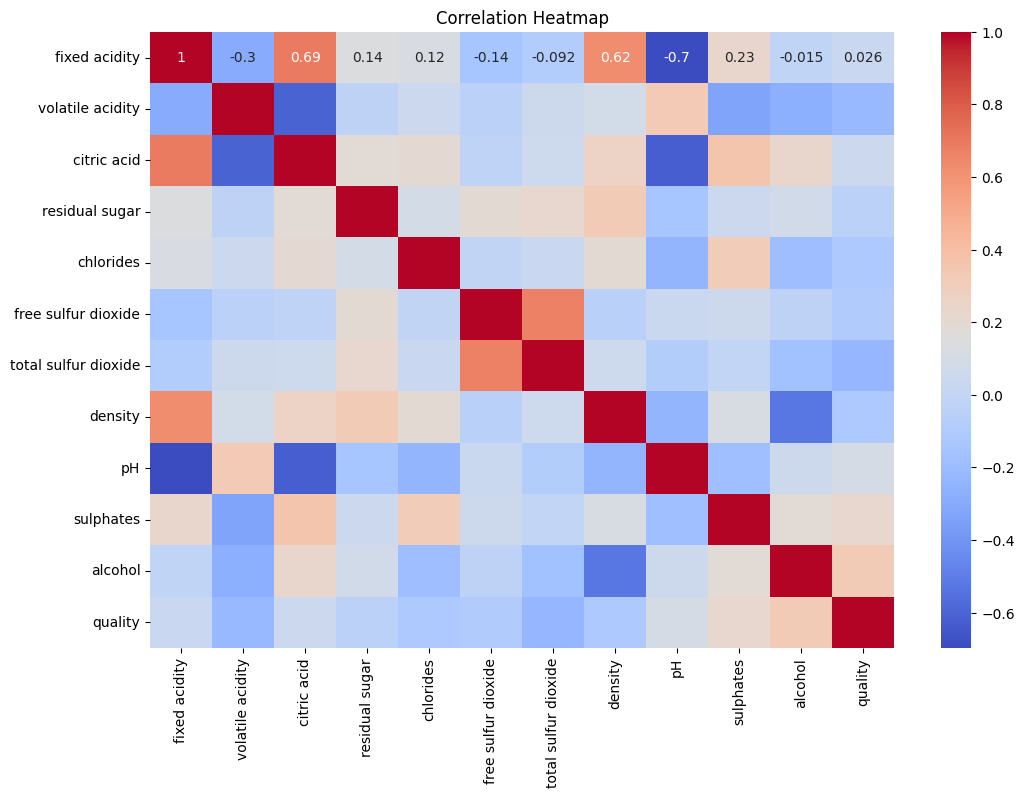

In [183]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Feature Engineering

In [184]:
df['sulfur_ratio'] = df['free sulfur dioxide'] / (df['total sulfur dioxide'] + 1e-6)
df['density_alcohol_ratio'] = df['density'] / df['alcohol']
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']
df['acid_sugar_ratio'] = df['total_acidity'] / (df['residual sugar'] + 1e-6)

# 6. Feature Scaling

In [185]:
x = df.drop('quality', axis=1)
y = df['quality']



In [186]:
y

0       0
1       1
2       1
3       1
4       1
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [188]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [189]:
x_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
140             7.4             0.700         0.00             1.9      0.076   
1059            8.9             0.480         0.53             4.0      0.101   
689             8.1             0.380         0.48             1.8      0.157   
204             7.0             0.430         0.36             1.6      0.089   
925             8.6             0.220         0.36             1.9      0.064   
...             ...               ...          ...             ...        ...   
73              7.4             0.700         0.00             1.9      0.076   
1557            6.6             0.855         0.02             2.4      0.062   
1275            8.0             0.715         0.22             2.3      0.075   
45              7.4             0.700         0.00             1.9      0.076   
808             7.4             0.530         0.12             1.9      0.165   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
140                  11.0                  34.0  0.99780  3.51       0.56   
1059                  3.0                  10.0  0.99586  3.21       0.59   
689                   5.0                  17.0  0.99760  3.30       1.05   
204                  14.0                  37.0  0.99615  3.34       0.56   
925                  53.0                  77.0  0.99604  3.47       0.87   
...                   ...                   ...      ...   ...        ...   
73                   11.0                  34.0  0.99780  3.51       0.56   
1557                 15.0                  23.0  0.99627  3.54       0.60   
1275                 13.0                  81.0  0.99688  3.24       0.54   
45                   11.0                  34.0  0.99780  3.51       0.56   
808                   4.0                  12.0  0.99702  3.26       0.86   

      alcohol  sulfur_ratio  density_alcohol_ratio  total_acidity  \
140       9.4      0.323529               0.106149          8.100   
1059     12.1      0.300000               0.082302          9.380   
689       9.4      0.294118               0.106128          8.480   
204       9.2      0.378378               0.108277          7.430   
925      11.0      0.688312               0.090549          8.820   
...       ...           ...                    ...            ...   
73        9.4      0.323529               0.106149          8.100   
1557     11.0      0.652174               0.090570          7.455   
1275      9.5      0.160494               0.104935          8.715   
45        9.4      0.323529               0.106149          8.100   
808       9.2      0.333333               0.108372          7.930   

      acid_sugar_ratio  
140           4.263156  
1059          2.344999  
689           4.711108  
204           4.643747  
925           4.642103  
...                ...  
73            4.263156  
1557          3.106249  
1275          3.789129  
45            4.263156  
808           4.173682  

[1279 rows x 15 columns]

In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
from sklearn.feature_selection import SequentialFeatureSelector

In [192]:
saler = StandardScaler()

In [193]:
x_new_train = saler.fit_transform(x_train)
x_new_test =  saler.fit_transform(x_test)

In [194]:
x_new_train

array([[-0.53879046,  0.92116807, -1.23833094, ...,  0.97685106,
        -0.4568895 ,  0.23774987],
       [ 0.32497614, -0.33178437,  1.37069309, ..., -1.59539501,
         0.29877858, -1.38083744],
       [-0.13569938, -0.90130821,  1.12455875, ...,  0.97455602,
        -0.23255054,  0.61574347],
       ...,
       [-0.19328382,  1.00659664, -0.15533983, ...,  0.84587901,
        -0.0938146 , -0.16224563],
       [-0.53879046,  0.92116807, -1.23833094, ...,  0.97685106,
        -0.4568895 ,  0.23774987],
       [-0.53879046, -0.04702245, -0.64760851, ...,  1.21661818,
        -0.55725167,  0.16224982]], shape=(1279, 15))

# 7. Feature Selection (Forward & Backward)



In [195]:
knn = KNeighborsClassifier(n_neighbors=5)

In [202]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='forward', scoring='accuracy', cv=5)

In [203]:
sfs.fit(x_new_train,y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=3, scoring='accuracy')

In [204]:
indices_features = sfs.get_support(indices= True)

In [205]:
indices_features

array([ 5,  9, 12])

In [206]:
lst = []
for i in indices_features:
    lst.append(x.columns[i])

In [207]:
lst

['free sulfur dioxide', 'sulphates', 'density_alcohol_ratio']

# 8. Train-Test Split and KNN Model

In [208]:
from sklearn.neighbors import KNeighborsClassifier

In [209]:
knn=KNeighborsClassifier()

In [210]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [211]:
knn.score(x_test,y_test)

0.709375

In [212]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')

In [213]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [214]:
knn.score(x_test,y_test)

0.728125

In [215]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree')

In [216]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [217]:
knn.score(x_test,y_test)

0.728125

Getting k values as from as cross validation

In [218]:
from sklearn.model_selection import cross_val_score

In [219]:
k_values=range(1,15)
cv_scores=[]

In [220]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
    cv_scores.append(np.mean(scores))

In [221]:
cv_scores 

[np.float64(0.6328585423197493),
 np.float64(0.5940830721003134),
 np.float64(0.6403663793103449),
 np.float64(0.5215948275862068),
 np.float64(0.6322335423197493),
 np.float64(0.6140909090909091),
 np.float64(0.622217868338558),
 np.float64(0.6184717868338558),
 np.float64(0.6184698275862068),
 np.float64(0.6309815830721003),
 np.float64(0.6378507053291537),
 np.float64(0.5453742163009404),
 np.float64(0.5428683385579938),
 np.float64(0.5497335423197491)]

In [ ]:
PCA (PRINCIPAL COMPONENT ANALYSIS)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA after scaling
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA-reduced data
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA - 2 Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Quality (0=Low, 1=High)')
plt.tight_layout()
plt.show()


In [222]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'sulfur_ratio',
       'density_alcohol_ratio', 'total_acidity', 'acid_sugar_ratio'],
      dtype='object')

In [223]:
df1 = df. drop(['quality'],axis = 1)

In [224]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.4             0.700         0.00             1.9      0.076   
2               7.4             0.700         0.00             1.9      0.076   
3               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    11.0                  34.0  0.99780  3.51       0.56   
2                    11.0                  34.0  0.99780  3.51       0.56   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  sulfur_ratio  density_alcohol_ratio  total_acidity  \
0         9.4      0.323529               0.106149          8.100   
1         9.4      0.323529               0.106149          8.100   
2         9.4      0.323529               0.106149          8.100   
3         9.4      0.323529               0.106149          8.100   
4         9.4      0.323529               0.106149          8.100   
...       ...           ...                    ...            ...   
1594     10.5      0.727273               0.094752          6.800   
1595     11.2      0.764706               0.088850          6.450   
1596     11.0      0.725000               0.090522          6.810   
1597     10.2      0.727273               0.097595          6.545   
1598     11.0      0.428571               0.090499          6.310   

      acid_sugar_ratio  
0             4.263156  
1             4.263156  
2             4.263156  
3             4.263156  
4             4.263156  
...                ...  
1594          3.399998  
1595          2.931817  
1596          2.960868  
1597          3.272498  
1598          1.752777  

[1599 rows x 15 columns]

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler = StandardScaler()

In [227]:
scaled_data = scaler.fit_transform(df1)

In [228]:
scaled_data

array([[-0.52339528,  0.89873054, -1.23196313, ...,  0.97234824,
        -0.44206539,  0.2433028 ],
       [-0.52339528,  0.89873054, -1.23196313, ...,  0.97234824,
        -0.44206539,  0.2433028 ],
       [-0.52339528,  0.89873054, -1.23196313, ...,  0.97234824,
        -0.44206539,  0.2433028 ],
       ...,
       [-1.163234  , -0.17341508, -0.58983235, ..., -0.69455761,
        -1.2121267 , -0.86414403],
       [-1.39590263,  0.58837259, -0.63922702, ...,  0.05993158,
        -1.37031759, -0.5991382 ],
       [-1.33773547, -1.30198941,  1.0895866 , ..., -0.69698187,
        -1.51060008, -1.89148759]], shape=(1599, 15))

In [229]:
from sklearn.decomposition import PCA

In [230]:
pca = PCA(n_components=2)

In [231]:
pca_data = pca.fit_transform(scaled_data)

In [232]:
pca_data

array([[-1.33619041,  1.94830042],
       [-1.33619041,  1.94830042],
       [-1.33619041,  1.94830042],
       ...,
       [-2.24749827, -1.52398934],
       [-2.97730095, -0.37656502],
       [-1.47461353, -1.69529414]], shape=(1599, 2))

In [233]:
pca.explained_variance_

array([4.04101376, 2.84743841])

In [234]:
pca_data.shape

(1599, 2)

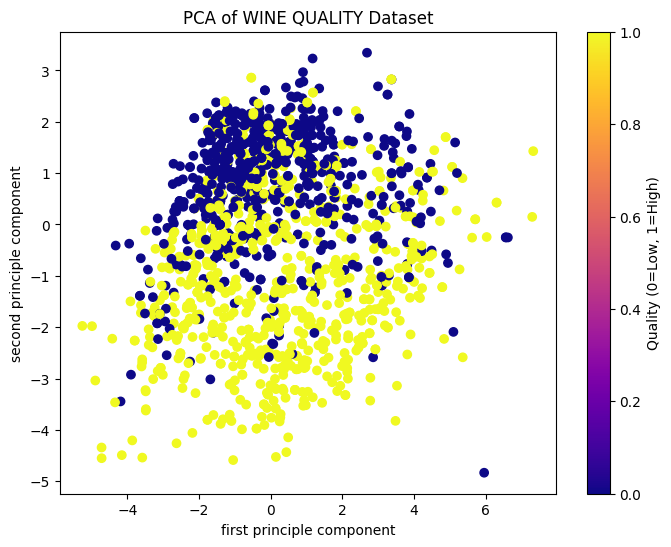

In [237]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=y,cmap='plasma')
plt.xlabel("first principle component")
plt.ylabel('second principle component')
plt.colorbar(label='Quality (0=Low, 1=High)')
plt.title('PCA of WINE QUALITY Dataset')
plt.show()

# 9. Model Evaluation

In [238]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'sulfur_ratio',
       'density_alcohol_ratio', 'total_acidity', 'acid_sugar_ratio'],
      dtype='object')

In [239]:
x = df.drop('quality', axis=1)
y = df['quality']


In [240]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [241]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [242]:
from sklearn.neighbors import KNeighborsClassifier

In [243]:
knn = KNeighborsClassifier()

In [244]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [245]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune 'n_neighbors'
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [246]:
y_pred = knn.predict(X_test_scaled)


In [247]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [249]:
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))

 Confusion Matrix:
 [[ 80  49]
 [ 41 150]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       129
           1       0.75      0.79      0.77       191

    accuracy                           0.72       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.72      0.72      0.72       320


 Accuracy Score: 0.71875


In [251]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

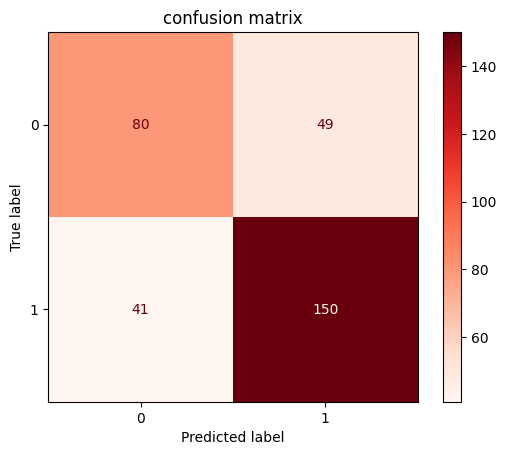

In [253]:
cnn = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnn, display_labels=df['quality'].unique())
disp.plot(cmap='Reds')
plt.title('confusion matrix')
plt.show()

Evaluation Metrics from This Matrix:
1. Accuracy
Accuracy = 𝑇𝑃+𝑇𝑁 / 𝑇𝑜𝑡𝑎𝑙 = 150+80 / 320 = 230 / 320  = 0.71875 ≈ 71.88 %

2. Precision for High Quality (Class 1)
Precision = 𝑇𝑃 / 𝑇𝑃 + 𝐹𝑃 =150 / 150 + 49 ≈ 0.753

3. Recall for High Quality (Class 1)
Recall = 𝑇𝑃 / 𝑇𝑃 + 𝐹𝑁 =150 / 150 + 41 ≈ 0.785

4. F1 Score for High Quality
𝐹1 = 2 × Precision.Recall / Precision + Recall
≈ 0.768
